<a href="https://colab.research.google.com/github/meenubenny/bike_sharind_demand_prediction/blob/main/Team_Notebook_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Seoul Bike Sharing Demand Prediction**

---



---




###**Steps**


---





1.   Importing necessary libraries
2.   Loading the data
3.   Prepare dataset
4.   Exploraatory data analysis
5.   Model training
6.   Conclusion






##1.   Importing necessary libraries



In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##2. Loading the data

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Alma Better/capstone project/SUPERVISED 1/SeoulBikeData.csv',sep=',',encoding='latin')

# Prepare dataset

In [5]:
#checking shape of data
df.shape

(8760, 14)

In [6]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [7]:
#checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
#Summarizing the stats of the data
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [9]:
#Check the missing values
df.isna().sum()
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
value = len(df[df.duplicated()])
value

0

# Observations

1) No Null values found, No duplicate rows found.

2) Date - Date column need to convert into Date format 

3) Columns to convert into numeric (for modelling Purpose)

• seasons

• holiday

• functioning day

4) Rename columns-

• Temperature(°C)

• Humidity(%)

• Wind speed (m/s)

• Visibility (10m)

• Dew point temperature(°C)

• Solar Radiation (MJ/m2)

• Rainfall(mm)

• Snowfall (cm)

• Rented Bike Count

• Functioning Day


In [11]:
# Renaming columns for better variable analysis
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
'Temperature(°C)':'Temperature',
'Humidity(%)':'Humidity',
'Wind speed (m/s)':'Wind_speed',
'Visibility (10m)':'Visibility',
'Dew point temperature(°C)':'Dew_point_temperature',
'Solar Radiation (MJ/m2)':'Solar_Radiation',
'Rainfall(mm)':'Rainfall',
'Snowfall (cm)':'Snowfall',
'Functioning Day':'Functioning_Day'})

In [12]:
df.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                173     2         -6.0        39         1.0   
3  01/12/2017                107     3         -6.2        40         0.9   
4  01/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

In [17]:
# Change The datatype of Date columns.
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [18]:
# Creating new columns  'Year','Month','Day.
# so further we can analyze the Bike rentals with respect to year months and day
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [19]:
#creating a new column of "weekend_day" and drop the column "Date","day","year"
df['weekend_day'] = df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0)
df = df.drop(columns= ['Date','day','year'],axis=1)

In [20]:
df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  month  weekend_day  
0  No Holiday             Yes     12            0  
1  No Holiday             Yes     12            0  
2  No Holiday             Yes     12            0  
3  No Holiday             Yes     12            0  
4  No Holiday             Yes     12            0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekend_day            8760 non-null   int64  
dtypes: f

In [22]:
df.describe().transpose()  

count         mean         std   min     25%      50%  \
Rented_Bike_Count      8760.0   704.602055  644.997468   0.0  191.00   504.50   
Hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
Wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
Visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
Dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
Solar_Radiation        8760.0     0.569111    0.868746   0.0    0.00     0.01   
Rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
Snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   
month                  8760.0     6.526027    3.448048   1.0    4.00     7.00   
weekend_day            8760.0     0.284932    0.451408   0.0    0.00     0.00   

                           75%      max  
Rented_Bike_Count      1065.25  3556.00  
Hour                     17.25    23.00  
Temperature              22.50    39.40  
Humidity                 74.00    98.00  
Wind_speed                2.30     7.40  
Visibility             2000.00  2000.00  
Dew_point_temperature    14.80    27.20  
Solar_Radiation           0.93     3.52  
Rainfall                  0.00    35.00  
Snowfall                  0.00     8.80  
month                    10.00    12.00  
weekend_day               1.00     1.00

In [23]:
# Numeric Features
numeric_features= df.select_dtypes(exclude='object')

In [24]:
# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  month                  8760 non-null   int64  
 11  weekend_day            8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [25]:
# describing numeric feature

numeric_features.describe().transpose()

count         mean         std   min     25%      50%  \
Rented_Bike_Count      8760.0   704.602055  644.997468   0.0  191.00   504.50   
Hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
Wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
Visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
Dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
Solar_Radiation        8760.0     0.569111    0.868746   0.0    0.00     0.01   
Rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
Snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   
month                  8760.0     6.526027    3.448048   1.0    4.00     7.00   
weekend_day            8760.0     0.284932    0.451408   0.0    0.00     0.00   

                           75%      max  
Rented_Bike_Count      1065.25  3556.00  
Hour                     17.25    23.00  
Temperature              22.50    39.40  
Humidity                 74.00    98.00  
Wind_speed                2.30     7.40  
Visibility             2000.00  2000.00  
Dew_point_temperature    14.80    27.20  
Solar_Radiation           0.93     3.52  
Rainfall                  0.00    35.00  
Snowfall                  0.00     8.80  
month                    10.00    12.00  
weekend_day               1.00     1.00

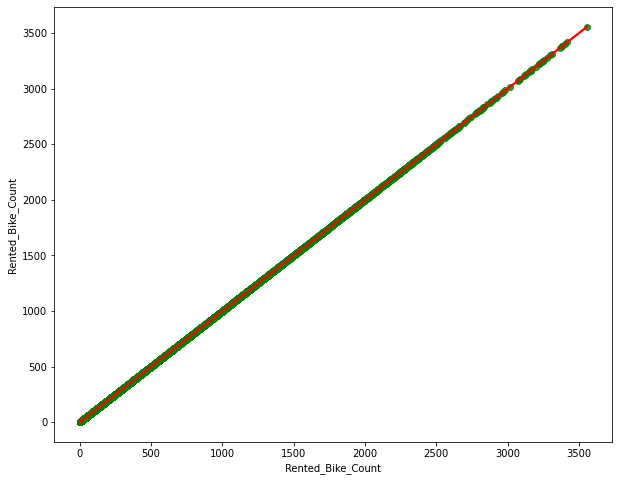

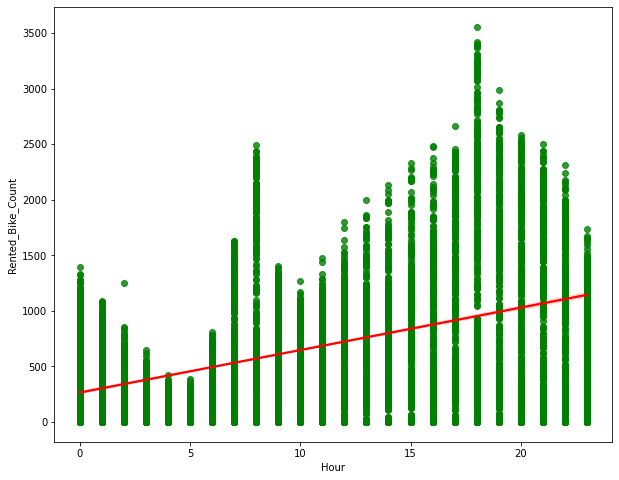

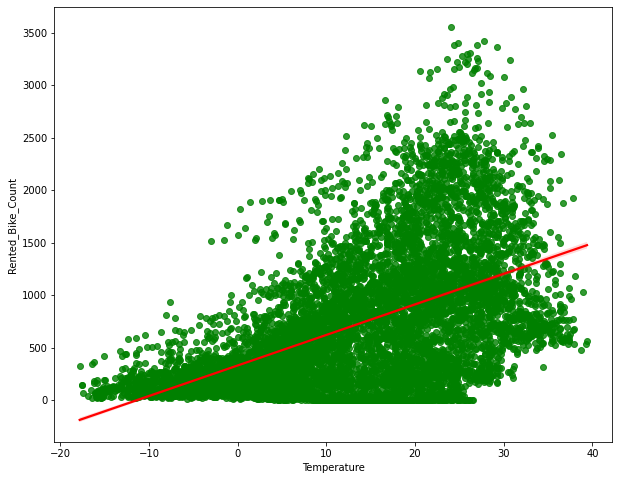

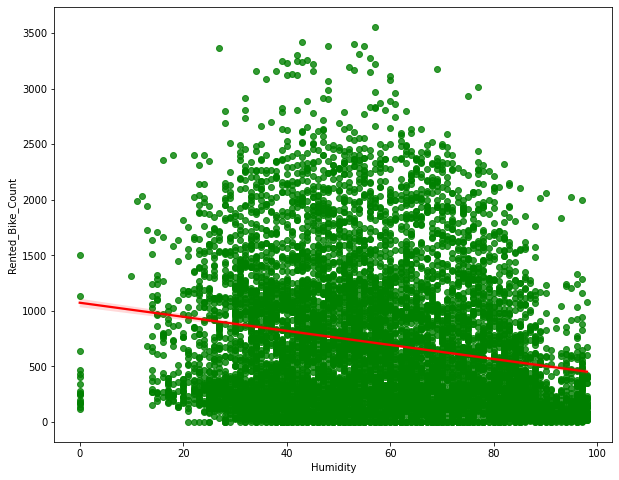

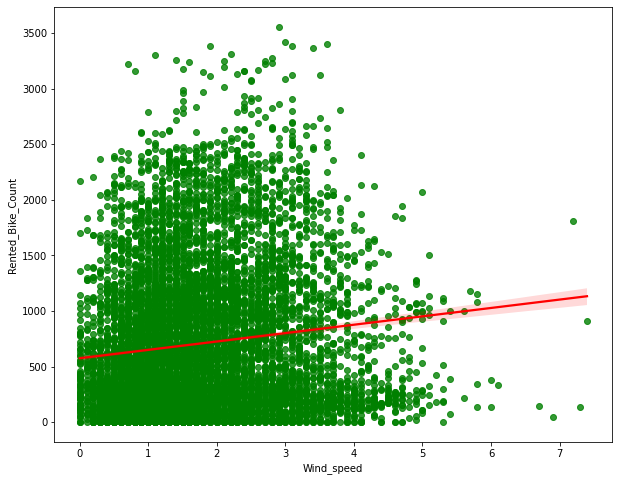

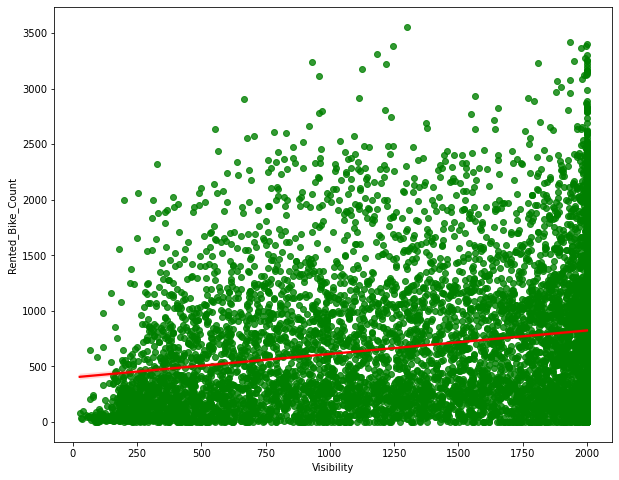

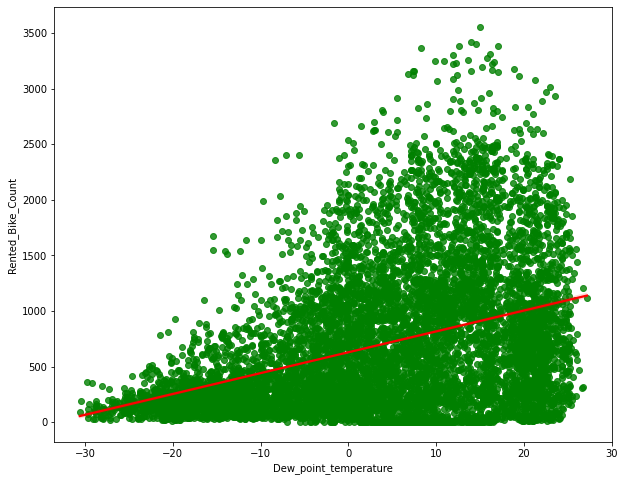

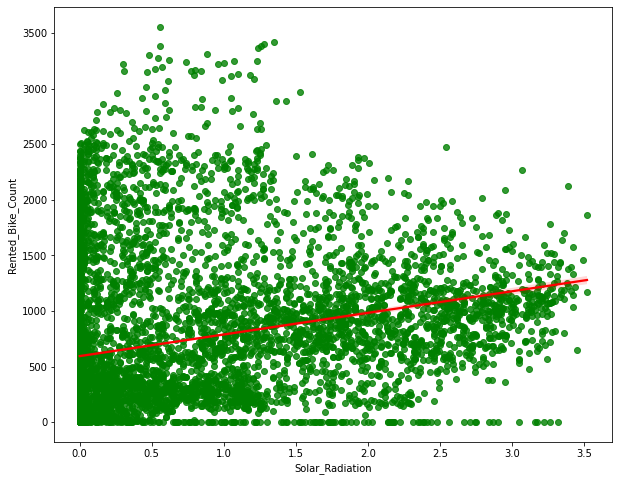

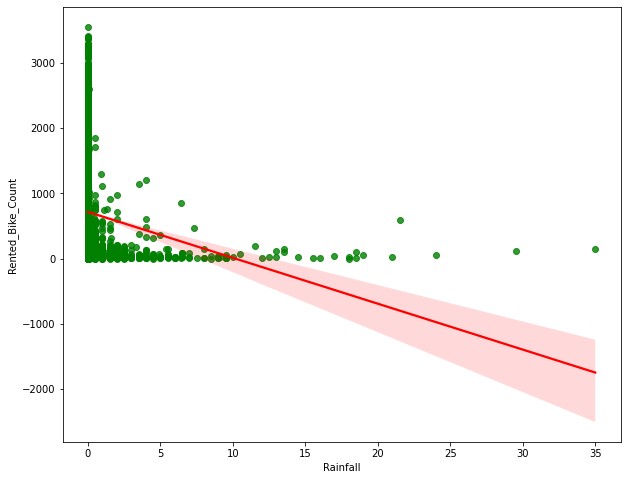

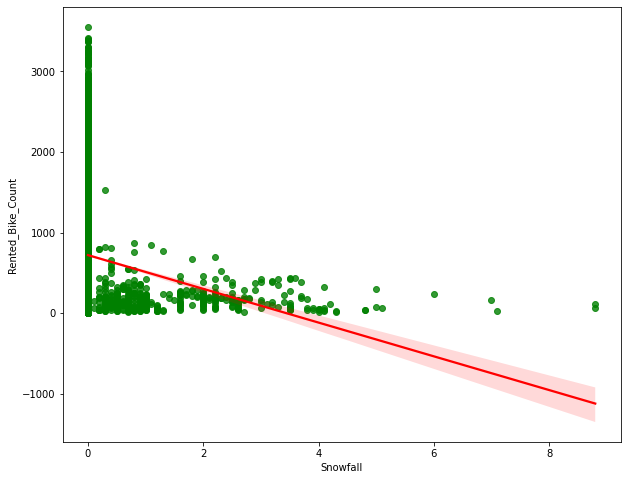

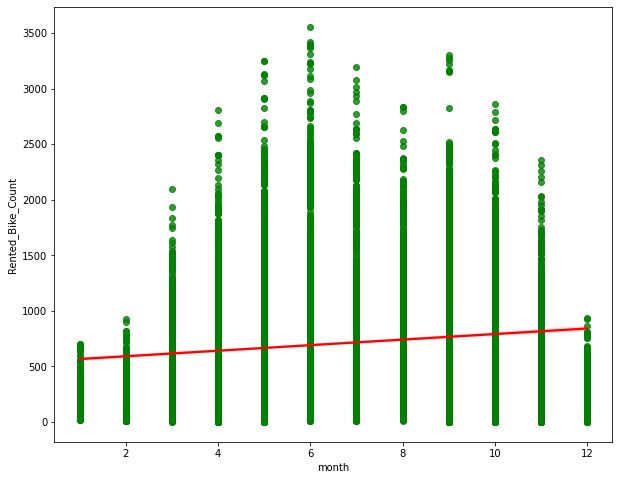

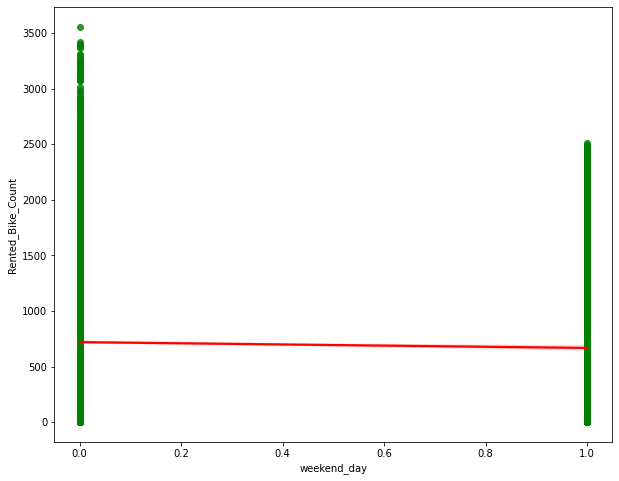

In [26]:
#printing the regression plot for all the numerical features
for col in numeric_features:
  plt.figure(figsize=(10,8))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'green'}, line_kws={"color": "red"})

In [27]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')

In [28]:
categorical_features

Seasons     Holiday Functioning_Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]

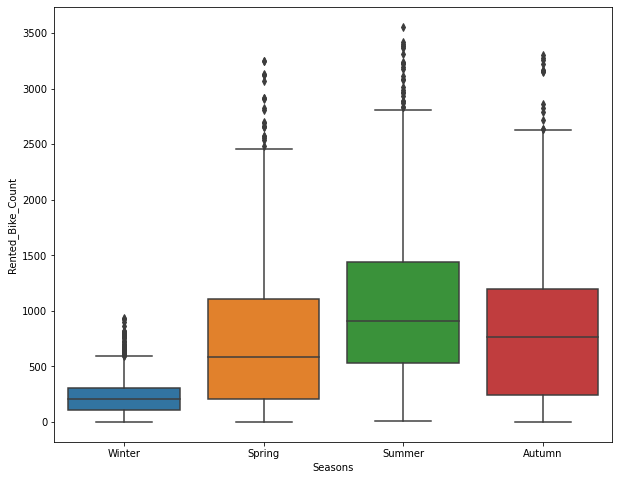

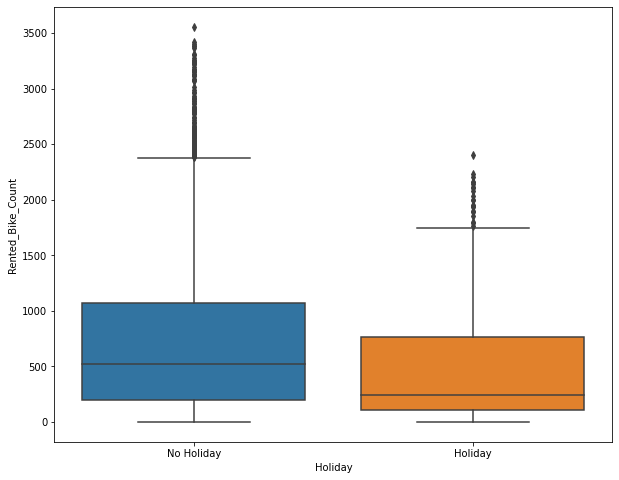

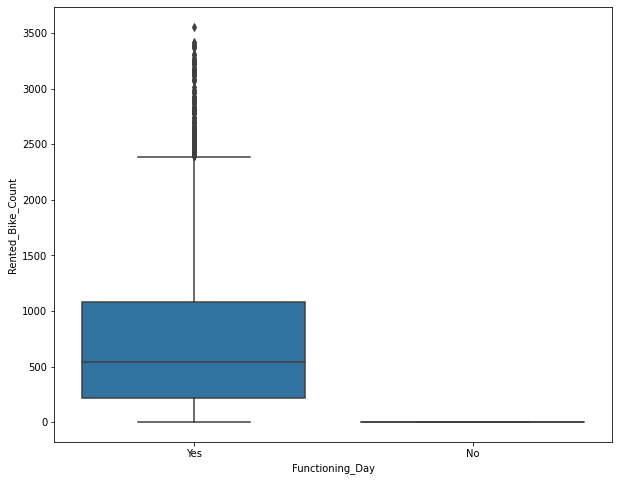

In [29]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented_Bike_Count"])
  plt.show()

 Conclusion
- Less demand on winter seasons
- Sligthly Higher demand during Non holidays
- Almost no demnad on non functioning day 

In [30]:
df['weekend_day'].value_counts()

0    6264
1    2496
Name: weekend_day, dtype: int64

In [31]:
columns = ['Hour','month','weekend_day']
for col in columns:
  df[col] = df[col].astype('category')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekend_day            8760 non-null   c

# Exploratory data analysis 


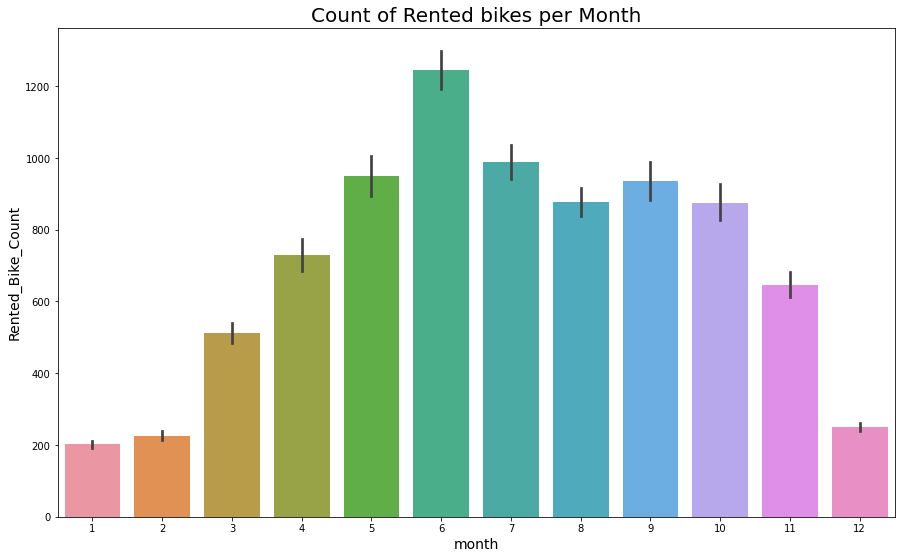

In [33]:
# Monthly trend of rented bikes
plt.figure(figsize=(15,9))
plt.ylabel('Month',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.barplot(x='month', y='Rented_Bike_Count', data = df)
graph.set_title('Count of Rented bikes per Month', fontsize = 20);
plt.show()

**Findings**

From the above bar plot we can clearly say that the demand for rented bike from month 5 to 10 is higher than other months and these months fall in summer.

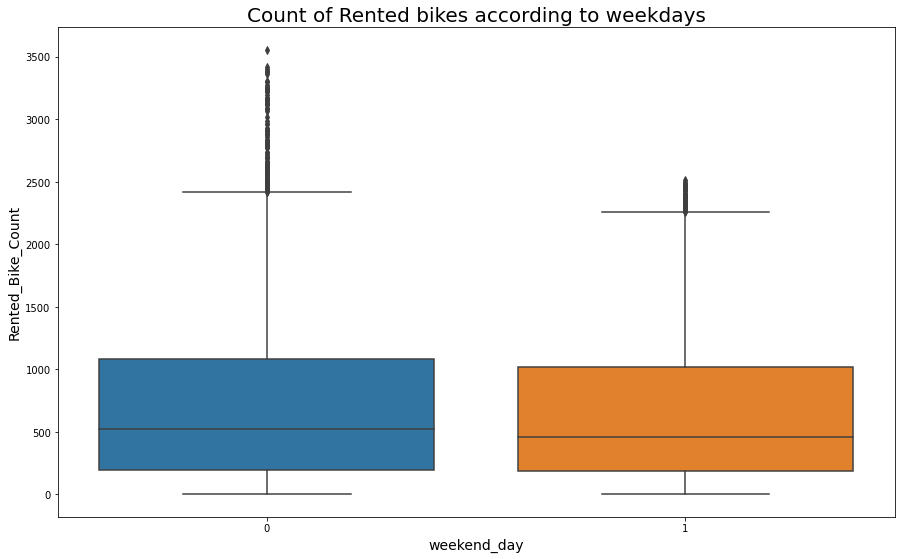

In [34]:
# Trend of rented bikes on weekend days
plt.figure(figsize=(15,9))
plt.ylabel('weekend days',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.boxplot(x='weekend_day', y='Rented_Bike_Count', data = df)
graph.set_title('Count of Rented bikes according to weekdays', fontsize = 20);
plt.show()

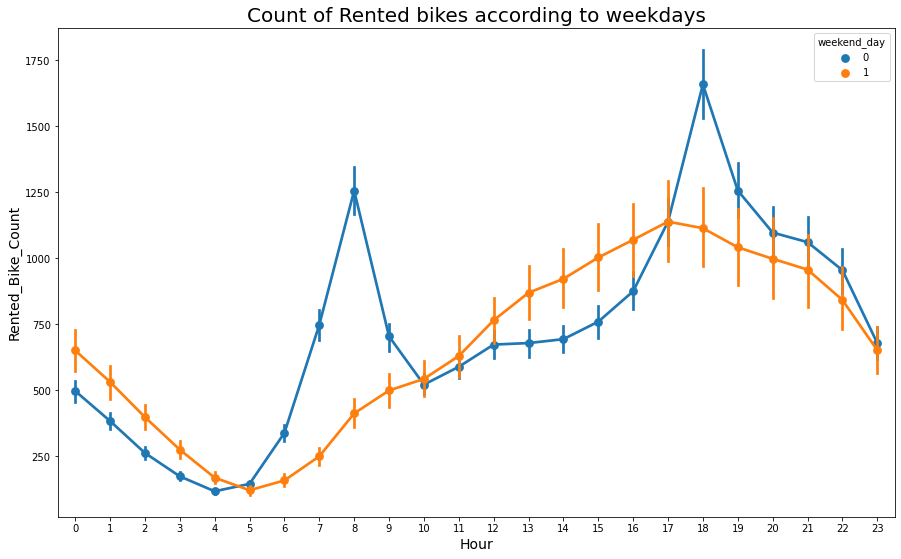

In [35]:
plt.figure(figsize=(15,9))
plt.ylabel('Hour',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.pointplot(x='Hour', y='Rented_Bike_Count', data=df, hue='weekend_day')
graph.set_title('Count of Rented bikes according to weekdays', fontsize = 20);
plt.show()

In [36]:
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

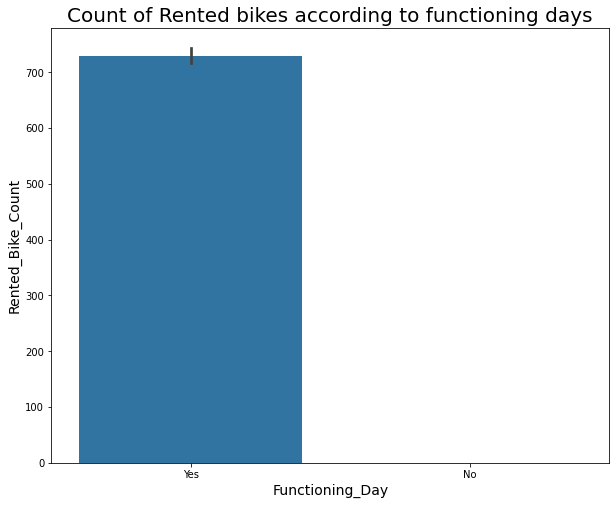

In [37]:
# Trend of rented bikes on functioning days 
plt.figure(figsize=(10,8))
plt.ylabel('Hour',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.barplot(x='Functioning_Day', y='Rented_Bike_Count', data=df)
graph.set_title('Count of Rented bikes according to functioning days', fontsize = 20);
plt.show()

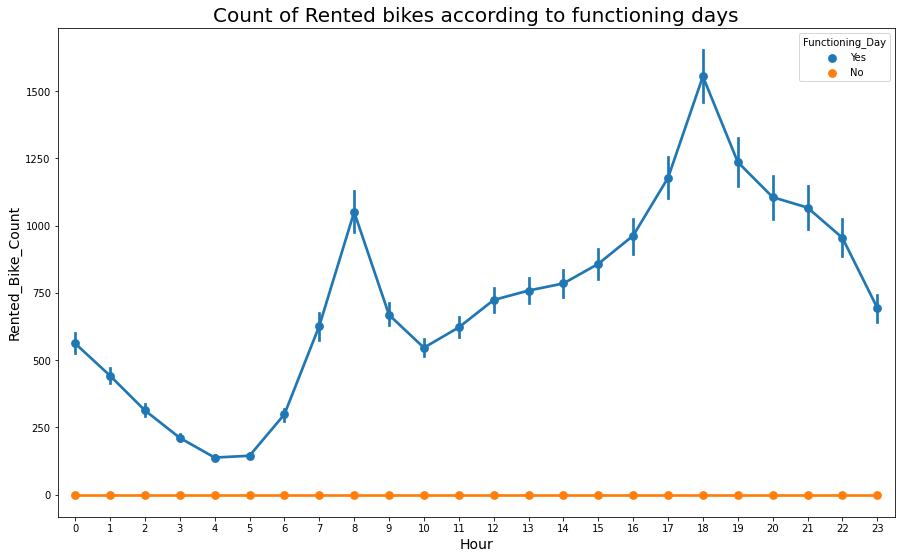

In [38]:
# visualisation using point plot
plt.figure(figsize=(15,9))
plt.ylabel('Functioning Days',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.pointplot(x='Hour', y='Rented_Bike_Count', data=df, hue='Functioning_Day')
graph.set_title('Count of Rented bikes according to functioning days', fontsize = 20);
plt.show()

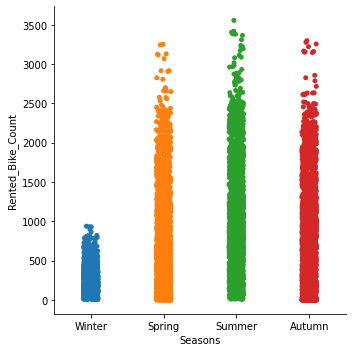

In [39]:
# Trend of rented bikes per seasons
graph=sns.catplot(x='Seasons',y='Rented_Bike_Count', data=df)
plt.show()

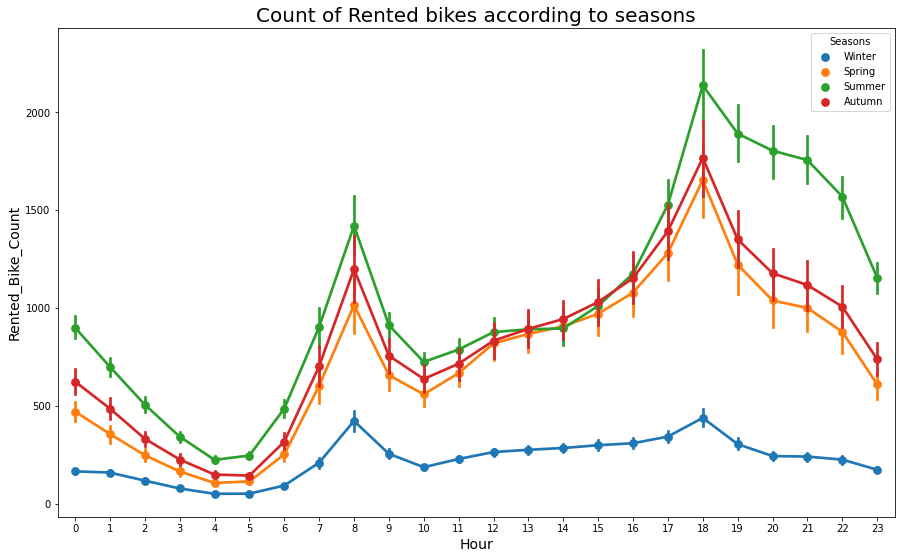

In [40]:
plt.figure(figsize=(15,9))
plt.ylabel('Hour',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.pointplot(x='Hour', y='Rented_Bike_Count', data=df, hue='Seasons')
graph.set_title('Count of Rented bikes according to seasons', fontsize = 20);
plt.show()

   
**Findings**

From the above plots we can clearly say that 


*   The demand for rented bike is less on winter seasons
*   Highest number of bike have rented in summer season
*   Almost equal percentage of bike rented in spring and autumn
*   Sligthly Higher demand during Non holidays
*   Almost no demand on non functioning day
















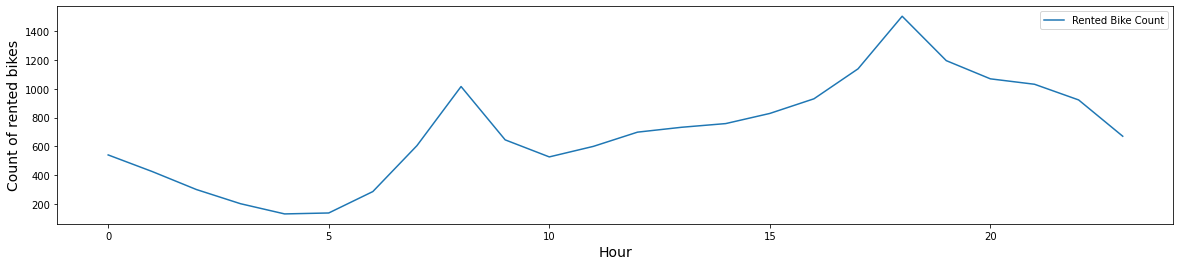

In [41]:
# Average count of rented bikes per hour
avg_rent_hrs = df.groupby('Hour')['Rented_Bike_Count'].mean()
plt.figure(figsize=(20,4))
plt.ylabel('Count of rented bikes',fontsize=14)
plt.xlabel('Hour',fontsize=14)
sns.lineplot( x = 'Hour', y = avg_rent_hrs, data = df, label = 'Rented Bike Count')
graph.set_title('Average Bikes Rented Per Hour', fontsize = 20);


**Findings**
* High increase of bikes rented between 8:00 am to 9:00 pm means people prefer rented bike during peak hours.
* We can clearly see that the demand peaks at 8:00 AM and 6:00 PM, so we can say that there is a very high demand during the opening and closing hours of the office.

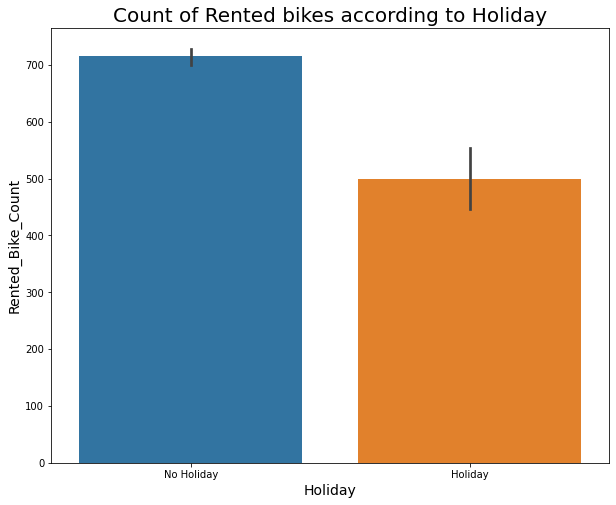

In [42]:
# Trend of rented bikes on holidays
plt.figure(figsize=(10,8))
plt.ylabel('Holiday',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.barplot(x='Holiday', y='Rented_Bike_Count', data=df)
graph.set_title('Count of Rented bikes according to Holiday', fontsize = 20);
plt.show()

**Findings:**

In holidays, there is more less number of bikes are rented as compared to no holidays. 

# Data distributions 

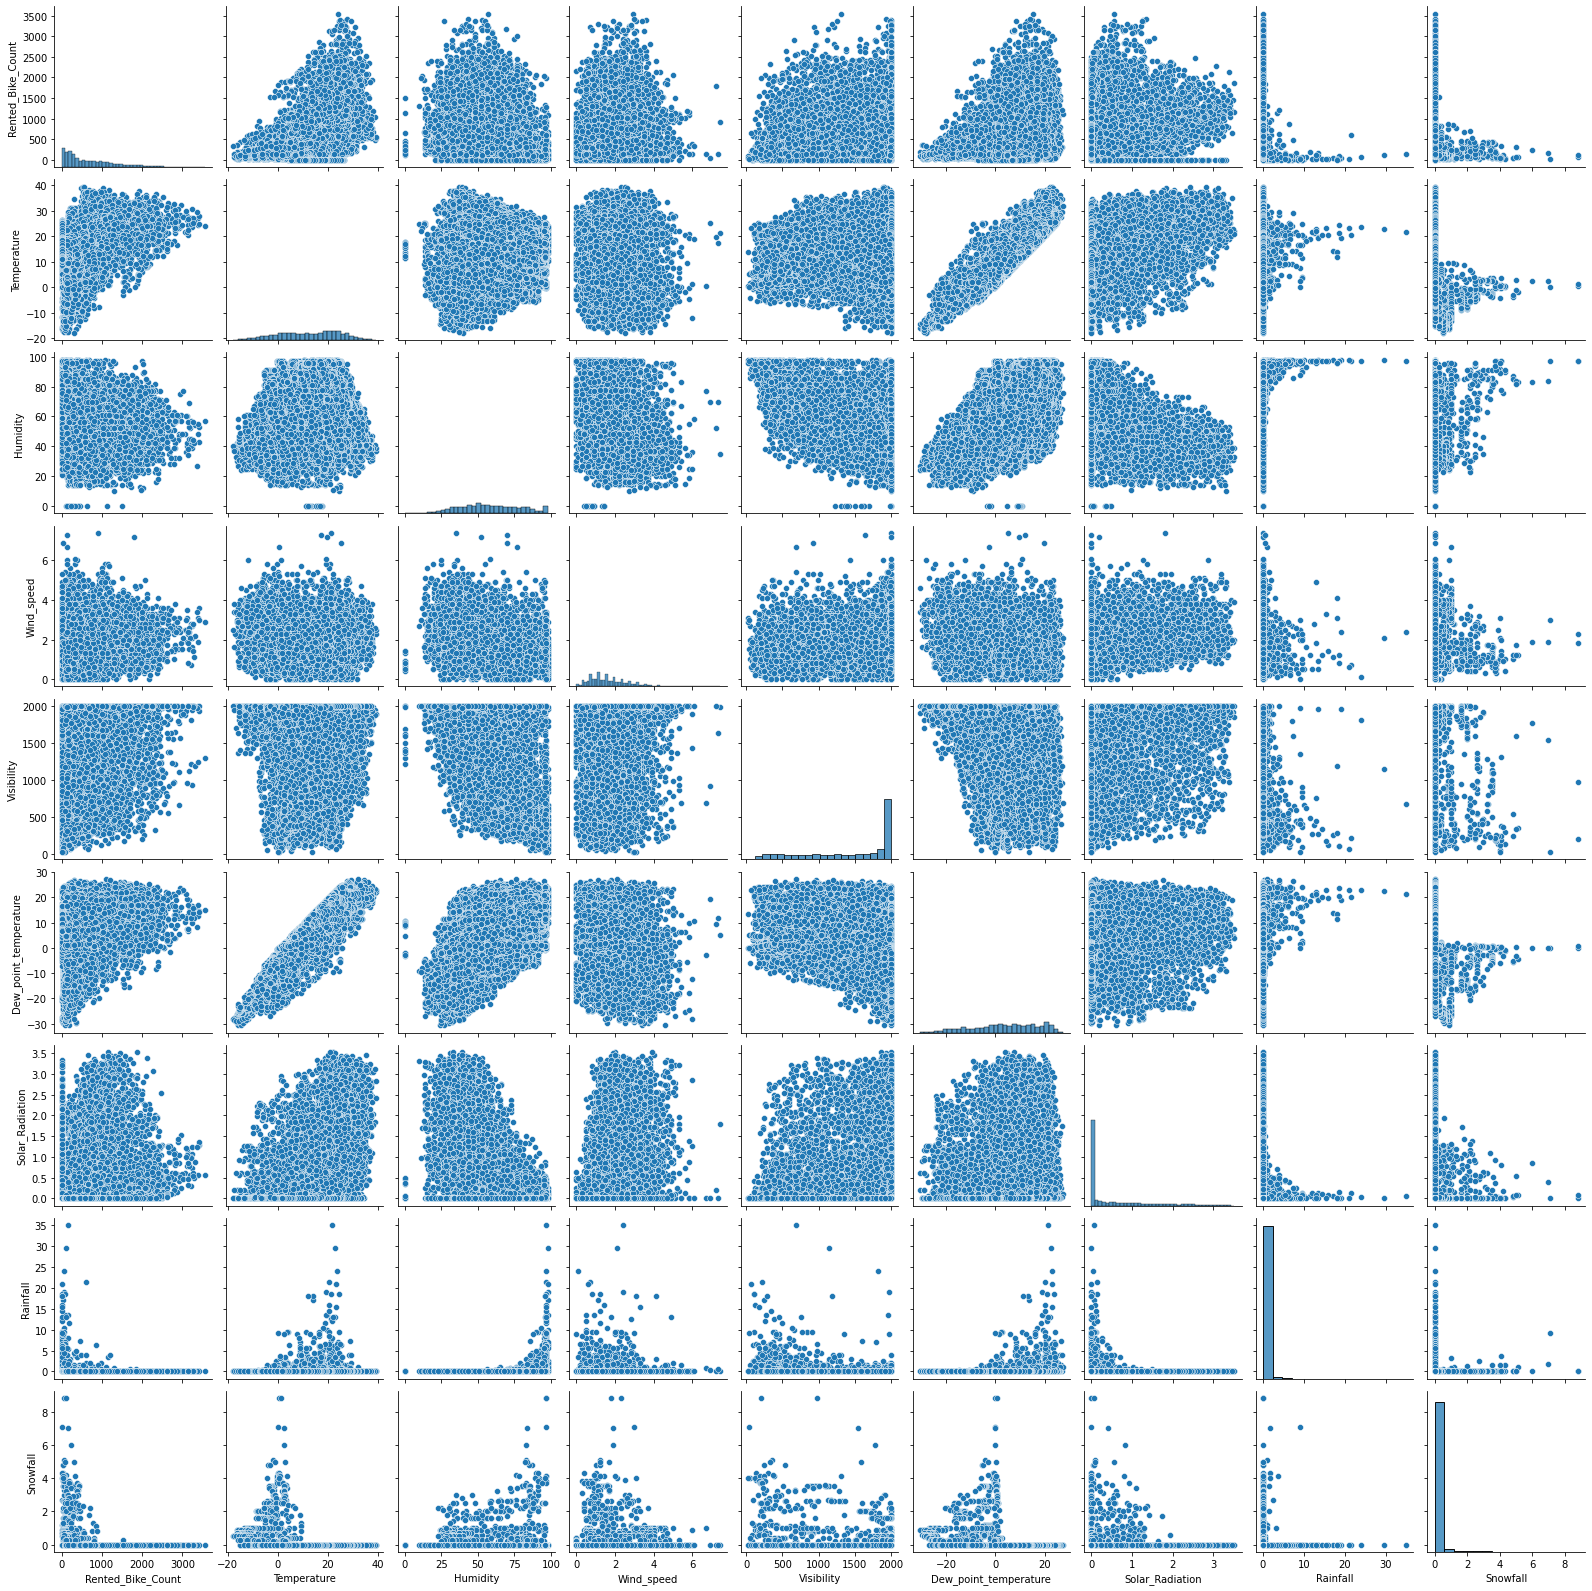

In [38]:
#Check for multicollinearity
sns.pairplot(df)
plt.show()

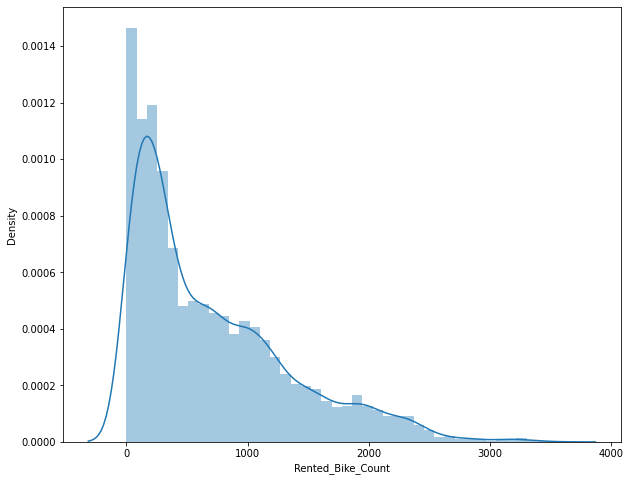

In [43]:
#visualising distribution of rented bike count
plt.figure(figsize=(10,8))
sns.distplot(df['Rented_Bike_Count'])
plt.show()

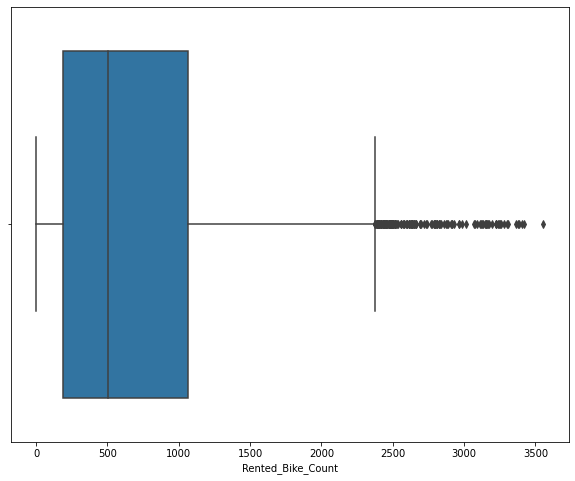

In [44]:
# Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

* **The above boxplot shows that we have detect outliers in Rented Bike Count column**

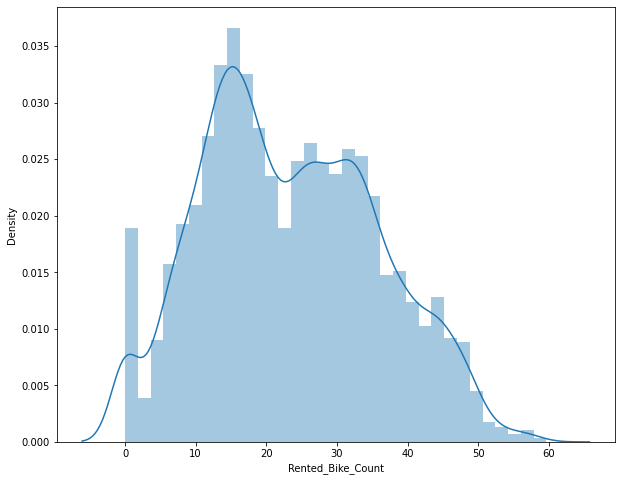

In [45]:
# square_root transformation

plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented_Bike_Count']))
plt.show()

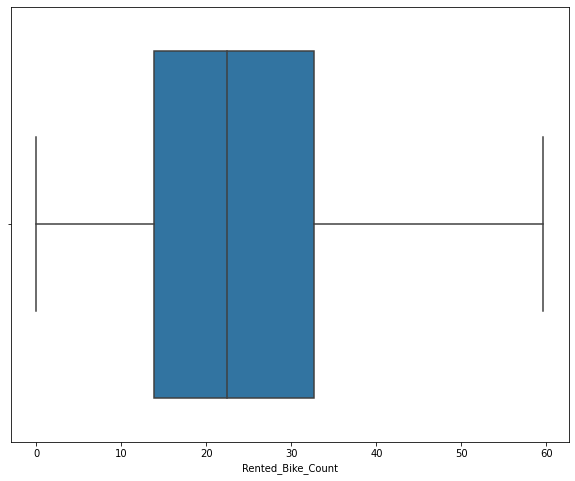

In [46]:
# After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,8))
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

* **After applying Square root to the Rented Bike Count column, we find that there is no outliers present.**

In [47]:
#Check for correlation
df.corr()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  \
Rented_Bike_Count               1.000000     0.538558 -0.199780    0.121108   
Temperature                     0.538558     1.000000  0.159371   -0.036252   
Humidity                       -0.199780     0.159371  1.000000   -0.336683   
Wind_speed                      0.121108    -0.036252 -0.336683    1.000000   
Visibility                      0.199280     0.034794 -0.543090    0.171507   
Dew_point_temperature           0.379788     0.912798  0.536894   -0.176486   
Solar_Radiation                 0.261837     0.353505 -0.461919    0.332274   
Rainfall                       -0.123074     0.050282  0.236397   -0.019674   
Snowfall                       -0.141804    -0.218405  0.108183   -0.003554   

                       Visibility  Dew_point_temperature  Solar_Radiation  \
Rented_Bike_Count        0.199280               0.379788         0.261837   
Temperature              0.034794               0.912798         0.353505   
Humidity                -0.543090               0.536894        -0.461919   
Wind_speed               0.171507              -0.176486         0.332274   
Visibility               1.000000              -0.176630         0.149738   
Dew_point_temperature   -0.176630               1.000000         0.094381   
Solar_Radiation          0.149738               0.094381         1.000000   
Rainfall                -0.167629               0.125597        -0.074290   
Snowfall                -0.121695              -0.150887        -0.072301   

                       Rainfall  Snowfall  
Rented_Bike_Count     -0.123074 -0.141804  
Temperature            0.050282 -0.218405  
Humidity               0.236397  0.108183  
Wind_speed            -0.019674 -0.003554  
Visibility            -0.167629 -0.121695  
Dew_point_temperature  0.125597 -0.150887  
Solar_Radiation       -0.074290 -0.072301  
Rainfall               1.000000  0.008500  
Snowfall               0.008500  1.000000

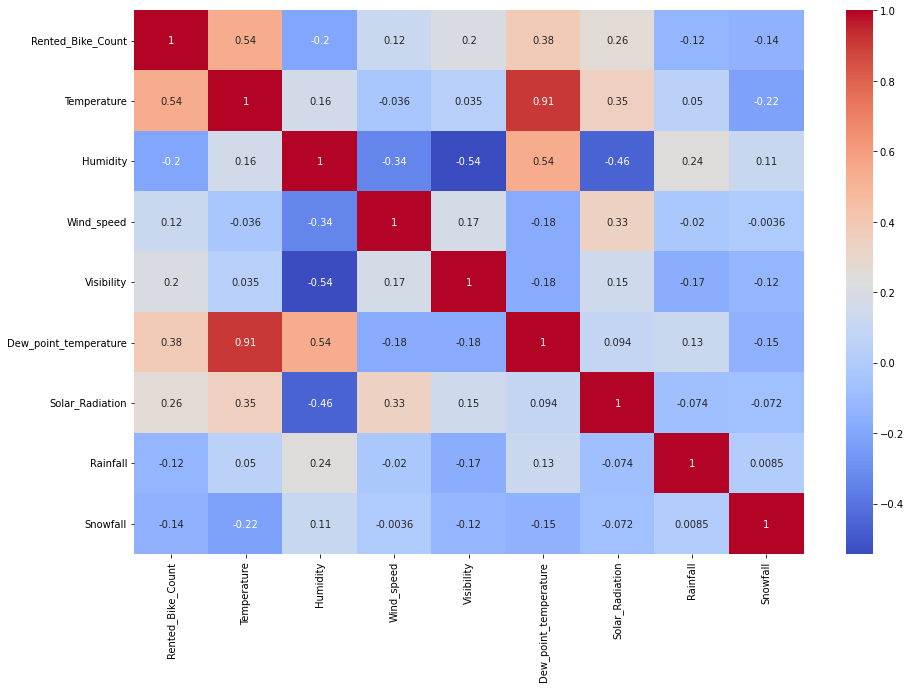

In [48]:
#checking correlation using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

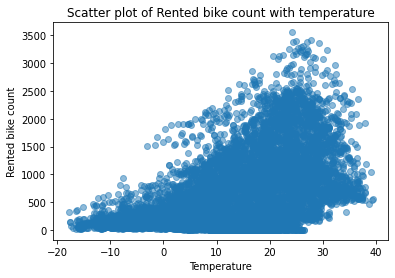

In [49]:
plt.scatter(df['Temperature'], df['Rented_Bike_Count'], alpha=0.5)
plt.title('Scatter plot of Rented bike count with temperature')
plt.xlabel('Temperature')
plt.ylabel('Rented bike count')
plt.show()

# Model Training

##**Lets prepare data for modeling**

In [50]:
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [51]:
dummy_categorical_feature

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning_Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 5 columns]

In [52]:
# Make copy of dataset
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [53]:
final_df.head()

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0               0               0               1                   1   
1               0               0               1                   1   
2               0               0               1                   1   
3               0               0               1                   1   
4               0               0               1                   1   

   Functioning_Day_Yes  Rented_Bike_Count  Hour  Temperature  Humidity  \
0                    1                254     0         -5.2        37   
1                    1                204     1         -5.5        38   
2                    1                173     2         -6.0        39   
3                    1                107     3         -6.2        40   
4                    1                 78     4         -6.0        36   

   Wind_speed  Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  \
0         2.2        2000                  -17.6              0.0       0.0   
1         0.8        2000                  -17.6              0.0       0.0   
2         1.0        2000                  -17.7              0.0       0.0   
3         0.9        2000                  -17.6              0.0       0.0   
4         2.3        2000                  -18.6              0.0       0.0   

   Snowfall  month  weekend_day  
0       0.0     12            0  
1       0.0     12            0  
2       0.0     12            0  
3       0.0     12            0  
4       0.0     12            0

In [54]:
final_df.describe().transpose()

count         mean         std   min     25%      50%  \
Seasons_Spring         8760.0     0.252055    0.434217   0.0    0.00     0.00   
Seasons_Summer         8760.0     0.252055    0.434217   0.0    0.00     0.00   
Seasons_Winter         8760.0     0.246575    0.431042   0.0    0.00     0.00   
Holiday_No Holiday     8760.0     0.950685    0.216537   0.0    1.00     1.00   
Functioning_Day_Yes    8760.0     0.966324    0.180404   0.0    1.00     1.00   
Rented_Bike_Count      8760.0   704.602055  644.997468   0.0  191.00   504.50   
Hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
Wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
Visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
Dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
Solar_Radiation        8760.0     0.569111    0.868746   0.0    0.00     0.01   
Rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
Snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   
month                  8760.0     6.526027    3.448048   1.0    4.00     7.00   
weekend_day            8760.0     0.284932    0.451408   0.0    0.00     0.00   

                           75%      max  
Seasons_Spring            1.00     1.00  
Seasons_Summer            1.00     1.00  
Seasons_Winter            0.00     1.00  
Holiday_No Holiday        1.00     1.00  
Functioning_Day_Yes       1.00     1.00  
Rented_Bike_Count      1065.25  3556.00  
Hour                     17.25    23.00  
Temperature              22.50    39.40  
Humidity                 74.00    98.00  
Wind_speed                2.30     7.40  
Visibility             2000.00  2000.00  
Dew_point_temperature    14.80    27.20  
Solar_Radiation           0.93     3.52  
Rainfall                  0.00    35.00  
Snowfall                  0.00     8.80  
month                    10.00    12.00  
weekend_day               1.00     1.00

##**Train Test split for regression**

Before fitting any model, it is a rule of thumb to split the dataset into a training and a test set. This means that some proportion of the data will go to train the model and some proportion will be used to evaluate how our model performs on unseen data. The ratios can vary from 60:40, 70:30 and 80:20 depending on the individual, but 75:25 is used for training and testing respectively. In this step we will split our data into training and testing set using the scikit Learn library.

In [55]:
#Independent and Dependent variables
# Train - Spliting data
X=final_df.drop(['Rented_Bike_Count'],axis=1)             # as rented bike count is the dependent feature

In [56]:
X.shape

(8760, 16)

In [57]:
y=np.sqrt(final_df['Rented_Bike_Count'])                  # dependent feature

In [58]:
#spliting of train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [59]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)                      # generalising train dataset 
X_test = std.transform(X_test)

# **LINEAR REGRESSION**

In [60]:
#linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_reg= LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [61]:
#check the coefficeint
linear_reg.coef_

array([-0.98944317, -1.1687889 , -3.19714522,  0.65642901,  5.30674788,
        3.56055069,  1.14198481, -5.2932926 ,  0.14609468, -0.0530512 ,
        5.20206358, -0.55040705, -1.80682762,  0.04720224,  0.52638951,
       -0.60761008])

In [62]:
#check the intercept
linear_reg.intercept_

23.442819487037088

In [63]:
# On which parameter the model has been trained
linear_reg.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

In [64]:
# Prediction with test data
reg_pred = linear_reg.predict(X_test)

In [65]:
reg_pred 

array([29.22178613, 34.93287766, 37.66488389, ..., 28.24324043,
        2.44748399, 22.52956324])

# Assumptions

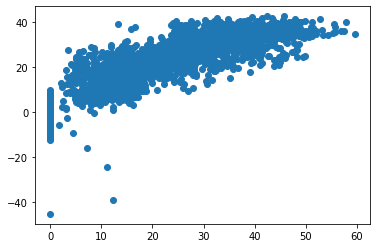

In [66]:
# Plot a scatter plot for the prediction
# Check Homoscedasticity
plt.scatter(y_test,reg_pred)
plt.show()

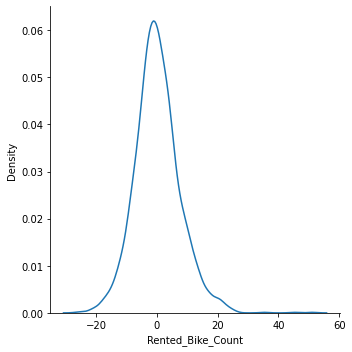

In [67]:
# Plot a scatter plot for residulas
residuals = y_test - reg_pred
sns.displot(residuals, kind='kde') # To check distributions
plt.show()

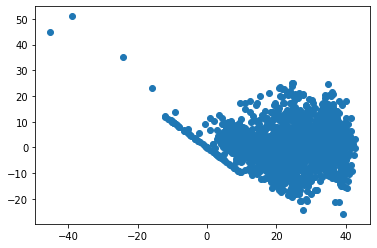

In [68]:
# Plot a scatter plot with respect to prediction and residulas
plt.scatter(reg_pred,residuals)
plt.show()

In [69]:
#get the X_train and X_test value
y_pred_train_linear=linear_reg.predict(X_train)
y_pred_test_linear=linear_reg.predict(X_test)

In [143]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('\n================Evalution Matrix=========================\n')

# calculate the errors for train data
MAE_linear = mean_absolute_error(y_train, y_pred_train_linear)            # Calculate the mean absolue error
MSE_linear = mean_squared_error(y_train, y_pred_train_linear)             # Calculate the mean squared error
# Calculate the root mean squared error
RMSE_linear = np.sqrt(MSE_linear)
print('MSE_linear:',MSE_linear)
print('MAE_linear:',MAE_linear)
print('RMSE_linear:',RMSE_linear)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_linear = r2_score(y_train, y_pred_train_linear)
print("R2_linear :",r2_linear)
Adjusted_R2_linear=(1-(1-r2_score(y_train, y_pred_train_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_R2_linear :",1-(1-r2_score(y_train, y_pred_train_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )



================Evalution Matrix=========================



ValueError: ignored

In [71]:
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE_linear,4),
             'MSE':round(MSE_linear,4),
             'RMSE':round(RMSE_linear,4),
             'R2_score':round(r2_linear,4),
             'Adjusted R2 score':round(Adjusted_R2_linear,4)}

In [142]:
# create train_result dataframe

train_results_df=pd.DataFrame(train_dict,index=[1])
train_results_df

Model     MAE      MSE    RMSE  R2_score  Adjusted R2 score
1  Random Forest  2.5646  12.3311  3.5116    0.9211             0.9205

In [72]:
# calculate the errors for test data
# Calculate the mean absolue error

print('\n================Evalution Matrix=========================\n')

MAEtest_linear = mean_absolute_error(y_test, y_pred_test_linear)
# Calculate the mean squared error
MSEtest_linear = mean_squared_error(y_test, y_pred_test_linear)
# Calculate the root mean squared error
RMSEtest_linear = np.sqrt(MSEtest_linear)
print('MSEtest_linear:',MSEtest_linear)
print('MAEtest_linear:',MAEtest_linear)
print('RMSEtest_linear:',RMSEtest_linear)
#calculate r2 and adjusted r2

r2test_linear = r2_score(y_test, y_pred_test_linear)
print("R2test_linear:",r2test_linear)
Adjusted_R2test_linear=(1-(1-r2_score(y_test, y_pred_test_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_R2test_linear :",1-(1-r2_score(y_test, y_pred_test_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
(1-(1-r2_score((y_test), (y_pred_test_linear)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


================Evalution Matrix=========================

MSEtest_linear: 54.96043918116387
MAEtest_linear: 5.598781644509546
RMSEtest_linear: 7.413530817442109
R2test_linear: 0.6368545829042638
Adjusted_R2test_linear : 0.6341807096076546


0.6341807096076546

In [73]:
test_dict={'Model':"Linear Regression",
             'MAE':round(MAEtest_linear,4),
             'MSE':round(MSEtest_linear,4),
             'RMSE':round(RMSEtest_linear,4),
             'R2_score':round(r2test_linear,4),
             'Adjusted R2 score':round(Adjusted_R2test_linear,4)}

In [144]:
# create test_result dataframe

test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

Model    MAE      MSE   RMSE  R2_score  Adjusted R2 score
1  Random Forest  2.759  14.9844  3.871     0.901             0.9003

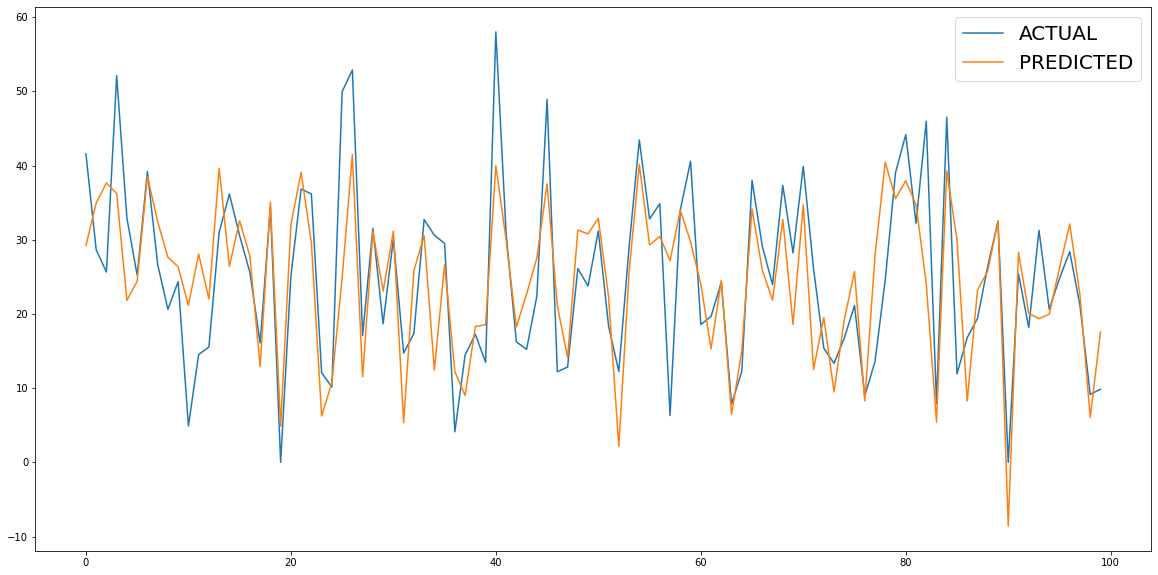

In [74]:
# ploting the line graph of actual and predicted values
plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(reg_pred[:100])
plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
plt.show()

# **LASSO REGRESSION**

In [75]:
from sklearn.linear_model import Lasso, LassoCV                      # importing lasso model 
from sklearn.model_selection import GridSearchCV                     # importing gridsearchcv method
lasso = Lasso()
#setting the parameters of the lasso model
params = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,35,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 35, 40,
                                   45, 50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [76]:
#get the X_train and X-test value
y_pred_train_lasso=lasso_regressor.predict(X_train)
y_pred_test_lasso=lasso_regressor.predict(X_test)

In [77]:
# Print the model score
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0014}
-52.88625211453801


In [78]:
# Create the model score
print(lasso_regressor.score(X_test, y_test), lasso_regressor.score(X_train, y_train))


-54.95571756718334 -52.52708910162982


# Assumptions

In [79]:
print('\n================Evalution Matrix=========================\n')

# Calculate the mean absolue error
MAE_lasso= mean_absolute_error(y_train, y_pred_train_lasso)
# Calculate the mean squared error
MSE_lasso= mean_squared_error((y_train), (y_pred_train_lasso))
# Calculate the root mean squared error
RMSE_lasso = np.sqrt(MSE_lasso)
print('MSE_lasso:',MSE_lasso)
print('MAE_lasso:',MAE_lasso)
print('RMSE_lasso:',RMSE_lasso)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_lasso= r2_score(y_train, y_pred_train_lasso)
print("R2_lasso :",r2_lasso)
Adjusted_R2_lasso = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2_lasso :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


================Evalution Matrix=========================

MSE_lasso: 52.52708910162982
MAE_lasso: 5.5827620347156905
RMSE_lasso: 7.24755745762873
R2_lasso : 0.6637848024921142
Adjusted R2_lasso : 0.6613092188933447


In [80]:
train_dict={'Model':"Lasso Regression",
             'MAE':round(MAE_lasso,4),
             'MSE':round(MSE_lasso,4),
             'RMSE':round(RMSE_lasso,4),
             'R2_score':round(r2_lasso,4),
             'Adjusted R2 score':round(Adjusted_R2_lasso,4)}

In [145]:
# appending train result to train result dataframe

traing_results_df=train_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score  Adjusted R2 score
0  Random Forest  2.5646  12.3311  3.5116    0.9211             0.9205
1  Random Forest  2.5646  12.3311  3.5116    0.9211             0.9205

In [81]:
print('\n================Evalution Matrix=========================\n')

# calculate the errors for test data
# Calculate the mean absolue error
MAEtest_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
# Calculate the mean squared error
MSEtest_lasso = mean_squared_error(y_test, y_pred_test_lasso)
# Calculate the root mean squared error
RMSEtest_lasso = np.sqrt(MSEtest_lasso)
print('MSEtest_lasso:',MSEtest_lasso)
print('MAEtest_lasso:',MAEtest_lasso)
print('RMSEtest_lasso:',RMSEtest_lasso)
#calculate r2 and adjusted r2

r2test_lasso = r2_score(y_test, y_pred_test_lasso)
print("R2test_lasso:",r2test_lasso)
Adjusted_R2test_lasso=(1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2test_lasso :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


================Evalution Matrix=========================

MSEtest_lasso: 54.95571756718334
MAEtest_lasso: 5.598772395072732
RMSEtest_lasso: 7.4132123649052
R2test_lasso: 0.6368857804802632
Adjusted R2test_lasso : 0.6342121368942919


In [82]:
test_dict={'Model':"Lasso Regression",
             'MAE':round(MAEtest_lasso,4),
             'MSE':round(MSEtest_lasso,4),
             'RMSE':round(RMSEtest_lasso,4),
             'R2_score':round(r2test_lasso,4),
             'Adjusted R2 score':round(Adjusted_R2test_lasso,4)}

In [146]:
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model    MAE      MSE   RMSE  R2_score  Adjusted R2 score
0  Random Forest  2.759  14.9844  3.871     0.901             0.9003
1  Random Forest  2.759  14.9844  3.871     0.901             0.9003

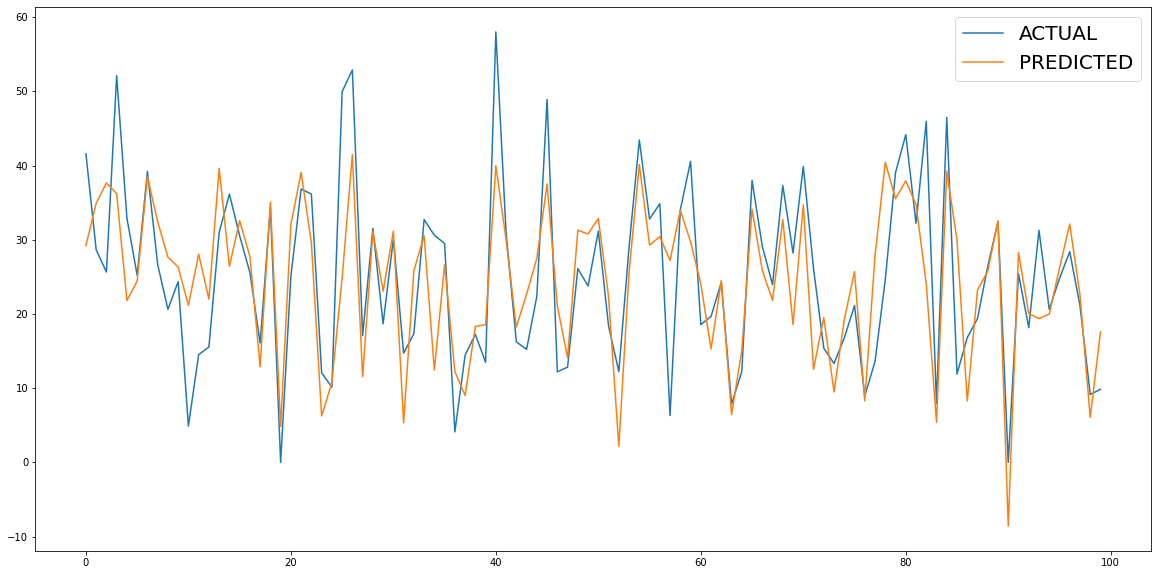

In [83]:
# ploting the line graph of actual and predicted values
plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(y_pred_test_lasso[:100])
plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
plt.show()

# **RIDGE REGRESSION**

In [84]:
from sklearn.linear_model import Ridge, LassoCV
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
#setting the parameters of the ridgemodel
params = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,35,40,45,50,55,60,100,0.0014]}
ridge_regressor = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 35, 40,
                                   45, 50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [85]:
#get the X_train and X-test value
y_pred_train_ridge=ridge_regressor.predict(X_train)
y_pred_test_ridge=ridge_regressor.predict(X_test)


In [86]:
#Print the model score
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-52.856837179480394


In [87]:
# Create the model score
print(ridge_regressor.score(X_test, y_test), ridge_regressor.score(X_train, y_train))

-54.95706198219 -52.544149680845855


# Assumptions

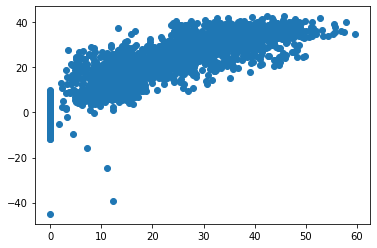

In [88]:
# Plot a scatter plot for the prediction
# Check Homoscedasticity
plt.scatter(y_test,y_pred_test_ridge)
plt.show()

In [89]:
print('\n================Evalution Matrix=========================\n')

# Calculate the mean absolue error
MAE_ridge= mean_absolute_error(y_train, y_pred_train_ridge)
# Calculate the mean squared error
MSE_ridge= mean_squared_error((y_train), (y_pred_train_ridge))
# Calculate the root mean squared error
RMSE_ridge = np.sqrt(MSE_ridge)
print('MSE_ridge:',MSE_ridge)
print('MAE_ridge:',MAE_ridge)
print('RMSE_ridge:',RMSE_ridge)
#calculate r2 and adjusted r2

r2_ridge= r2_score(y_train, y_pred_train_ridge)
print("R2_ridge :",r2_ridge)
Adjusted_R2_ridge=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2_ridge :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


================Evalution Matrix=========================

MSE_ridge: 52.544149680845855
MAE_ridge: 5.587902829067304
RMSE_ridge: 7.24873435027425
R2_ridge : 0.663675601199813
Adjusted R2_ridge : 0.6611992135418272


In [90]:
train_dict={'Model':"Rigde Regression",
             'MAE':round(MAE_ridge,4),
             'MSE':round(MSE_ridge,4),
             'RMSE':round(RMSE_ridge,4),
             'R2_score':round(r2_ridge,4),
             'Adjusted R2 score':round(Adjusted_R2_ridge,4)}

In [147]:
train_results_df=train_results_df.append(train_dict,ignore_index=True)
train_results_df

Model     MAE      MSE    RMSE  R2_score  Adjusted R2 score
0  Random Forest  2.5646  12.3311  3.5116    0.9211             0.9205
1  Random Forest  2.5646  12.3311  3.5116    0.9211             0.9205

In [91]:
print('\n================Evalution Matrix=========================\n')

# calculate the errors for test data
# Calculate the mean absolue error
MAEtest_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
# Calculate the mean squared error
MSEtest_ridge = mean_squared_error(y_test, y_pred_test_ridge)
# Calculate the root mean squared error
RMSEtest_ridge = np.sqrt(MSEtest_ridge)
print('MSEtest_ridge:',MSEtest_ridge)
print('MAEtest_ridge:',MAEtest_ridge)
print('RMSEtest_ridge:',RMSEtest_ridge)
#calculate r2 and adjusted r2

r2test_ridge = r2_score(y_test, y_pred_test_ridge)
print("R2test_ridge:",r2test_ridge)
Adjusted_R2test_ridge=(1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_R2test_ridge :",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


================Evalution Matrix=========================

MSEtest_ridge: 54.95706198219
MAEtest_ridge: 5.60144447902748
RMSEtest_ridge: 7.413303041302844
R2test_ridge: 0.6368768973971655
Adjusted_R2test_ridge : 0.6342031884042316


In [92]:
test_dict={'Model':"Ridge Regression",
             'MAE':round(MAEtest_ridge,4),
             'MSE':round(MSEtest_ridge,4),
             'RMSE':round(RMSEtest_ridge,4),
             'R2_score':round(r2test_ridge,4),
             'Adjusted R2 score':round(Adjusted_R2test_ridge,4)}

In [148]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model    MAE      MSE   RMSE  R2_score  Adjusted R2 score
0  Random Forest  2.759  14.9844  3.871     0.901             0.9003
1  Random Forest  2.759  14.9844  3.871     0.901             0.9003
2  Random Forest  2.759  14.9844  3.871     0.901             0.9003

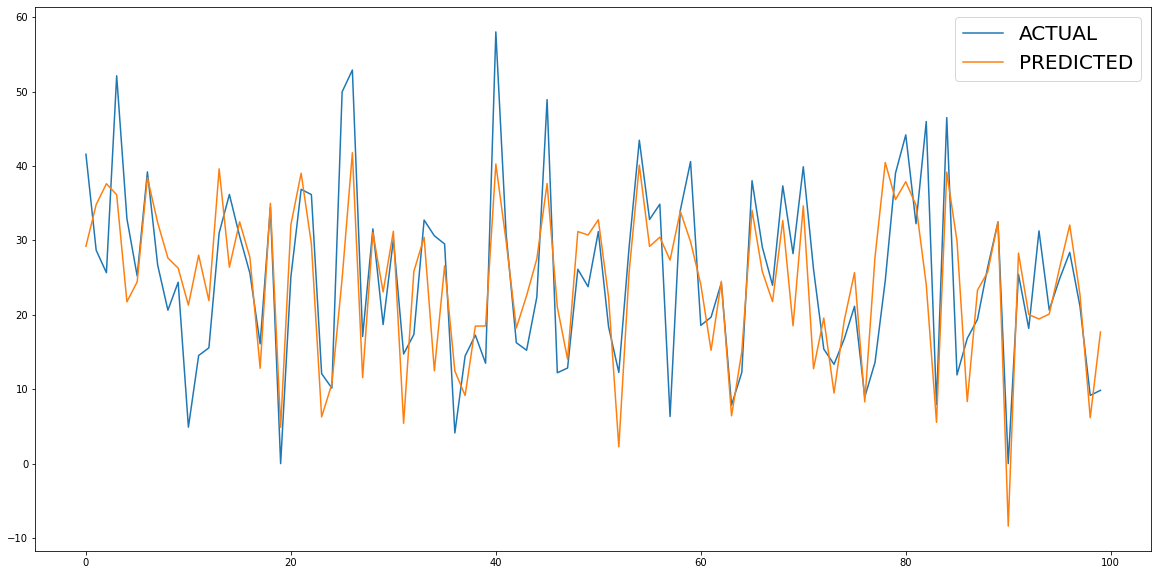

In [93]:
# ploting the line graph of actual and predicted values
plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(y_pred_test_ridge[:100])
plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
plt.show()

# **RANDOM FOREST REGRESSOR**

In [94]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor 
#creating model of random forest
random = RandomForestRegressor(n_estimators = 180, random_state = 21 ,criterion= 'mse',max_depth=13 ,max_leaf_nodes= 80)

In [95]:
random.fit(X_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=13, max_leaf_nodes=80,
                      n_estimators=180, random_state=21)

In [96]:
# Prediction on train dataset

y_pred_train_random = random.predict(X_train)

In [97]:
#Prediction on test dataset

y_pred_test_random = random.predict(X_test)

# Assumptions

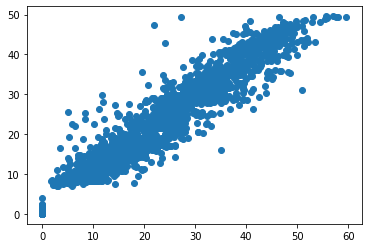

In [98]:
# Plot a scatter plot for the prediction
# Check Homoscedasticity
plt.scatter(y_test,y_pred_test_random)
plt.show()

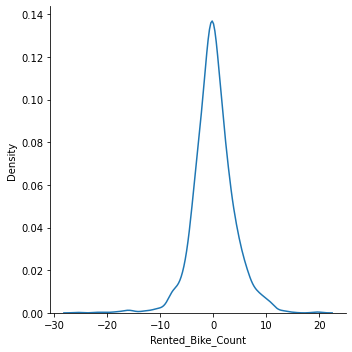

In [99]:
# Plot a scatter plot for residulas
residuals = y_test - y_pred_test_random
sns.displot(residuals, kind='kde') # To check distributions
plt.show()

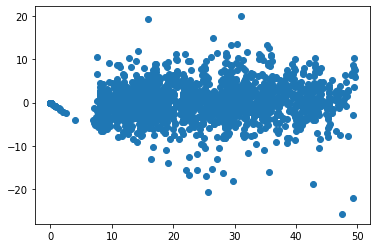

In [100]:
# Plot a scatter plot with respect to prediction and residulas
plt.scatter(y_pred_test_random,residuals)
plt.show()

In [101]:
print('\n================Evalution Matrix=========================\n')

# calculate the errors for train data
# Calculate the mean absolue error
MAE_random = mean_absolute_error(y_train, y_pred_train_random)
# Calculate the mean squared error
MSE_random = mean_squared_error(y_train, y_pred_train_random)
# Calculate the root mean squared error
RMSE_random = np.sqrt(MSE_random)
print('MSE_random:',MSE_random)
print('MAE_random:',MAE_random)
print('RMSE_random:',RMSE_random)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_random = r2_score(y_train, y_pred_train_random)
print("R2_random :",r2_random)
Adjusted_R2_random=(1-(1-r2_score(y_train, y_pred_train_random))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_R2_random :",1-(1-r2_score(y_train, y_pred_train_random))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) ) 


================Evalution Matrix=========================

MSE_random: 12.331080726433425
MAE_random: 2.564619664742169
RMSE_random: 3.511563857661345
R2_random : 0.9210712641261734
Adjusted_R2_random : 0.9204901045431171


In [102]:
train_dict={'Model':"Random Forest",
             'MAE':round(MAE_random,4),
             'MSE':round(MSE_random,4),
             'RMSE':round(RMSE_random,4),
             'R2_score':round(r2_random,4),
             'Adjusted R2 score':round(Adjusted_R2_random,4)}

In [150]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model    MAE      MSE   RMSE  R2_score  Adjusted R2 score
0  Random Forest  2.759  14.9844  3.871     0.901             0.9003
1  Random Forest  2.759  14.9844  3.871     0.901             0.9003
2  Random Forest  2.759  14.9844  3.871     0.901             0.9003
3  Random Forest  2.759  14.9844  3.871     0.901             0.9003
4  Random Forest  2.759  14.9844  3.871     0.901             0.9003

In [103]:
print('\n================Evalution Matrix=========================\n')

# calculate the errors for test data
# Calculate the mean absolue error
MAEtest_random = mean_absolute_error(y_test, y_pred_test_random)
# Calculate the mean squared error
MSEtest_random = mean_squared_error(y_test, y_pred_test_random)
# Calculate the root mean squared error
RMSEtest_random = np.sqrt(MSEtest_random)
print('MSEtest_random:',MSEtest_random)
print('MAEtest_random:',MAEtest_random)
print('RMSEtest_random:',RMSEtest_random)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2test_random = r2_score(y_test, y_pred_test_random)
print("R2test_random :",r2_random)
Adjusted_R2test_random=(1-(1-r2_score(y_test, y_pred_test_random))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_R2test_random :",1-(1-r2_score(y_test, y_pred_test_random))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) ) 


================Evalution Matrix=========================

MSEtest_random: 14.984355312252857
MAEtest_random: 2.758981618176812
RMSEtest_random: 3.870963098797618
R2test_random : 0.9210712641261734
Adjusted_R2test_random : 0.9002634202167409


In [104]:
test_dict={'Model':"Random Forest",
             'MAE':round(MAEtest_random,4),
             'MSE':round(MSEtest_random,4),
             'RMSE':round(RMSEtest_random,4),
             'R2_score':round(r2test_random,4),
             'Adjusted R2 score':round(Adjusted_R2test_random,4)}

In [149]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model    MAE      MSE   RMSE  R2_score  Adjusted R2 score
0  Random Forest  2.759  14.9844  3.871     0.901             0.9003
1  Random Forest  2.759  14.9844  3.871     0.901             0.9003
2  Random Forest  2.759  14.9844  3.871     0.901             0.9003
3  Random Forest  2.759  14.9844  3.871     0.901             0.9003

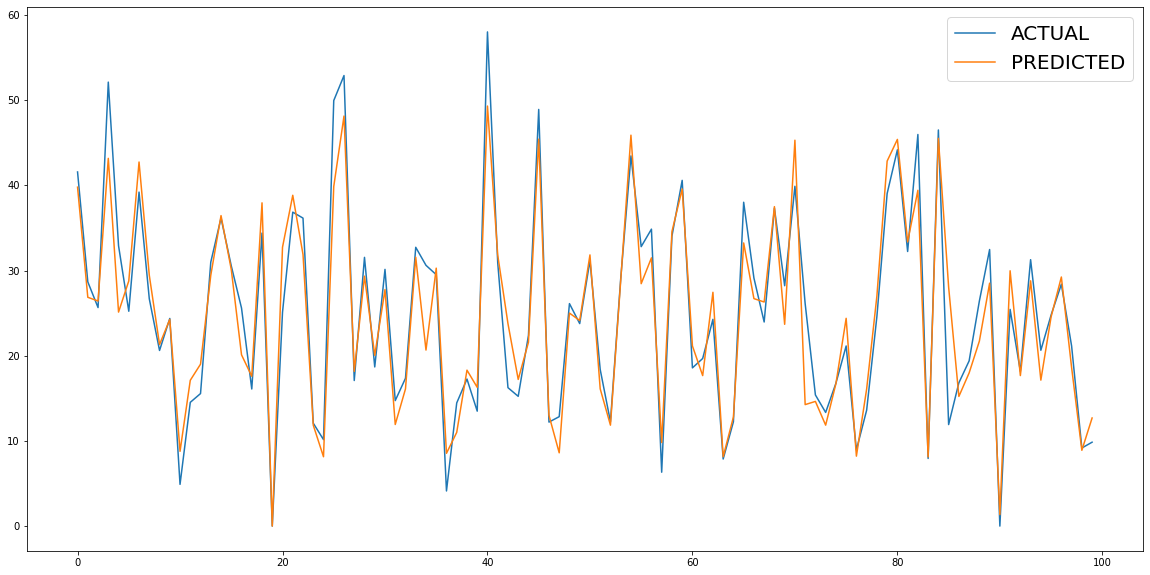

In [105]:
# ploting the line graph of actual and predicted values

plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(y_pred_test_random[:100])
plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
plt.show()


# **ELASTICNET REGULARIZATION MODEL**

In [106]:
# elasticnet regularization model
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1,l1_ratio = 0.5)
elastic_net = elastic_net.fit(X_train,y_train)

In [98]:
elastic_net.score(X_train,y_train)

0.6590771695484683

In [107]:
# prediction of train data
y_pred_train_elasticnet = elastic_net.predict(X_train)

In [108]:
#Prediction on test dataset

y_pred_test_elasticnet = elastic_net.predict(X_test)

# Assumptions

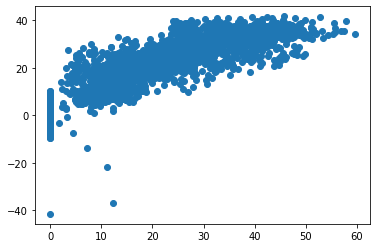

In [109]:
# Plot a scatter plot for the prediction
# Check Homoscedasticity
plt.scatter(y_test,y_pred_test_elasticnet)
plt.show()

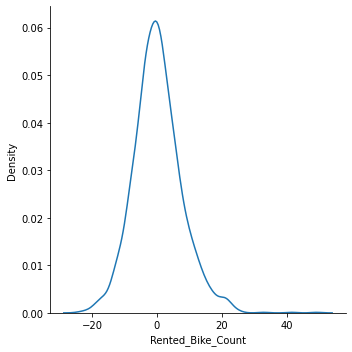

In [110]:
# Plot a scatter plot for residulas
residuals = y_test - y_pred_test_elasticnet
sns.displot(residuals, kind='kde') # To check distributions
plt.show()

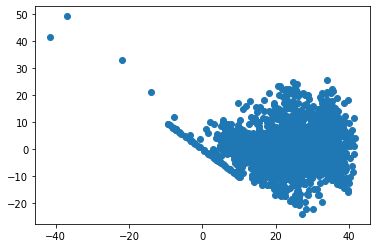

In [111]:
# Plot a scatter plot with respect to prediction and residulas
plt.scatter(y_pred_test_elasticnet,residuals)
plt.show()

In [112]:
print('\n================Evalution Matrix=========================\n')

# calculate the errors for train data
# Calculate the mean absolue error
MAE_elasticnet = mean_absolute_error(y_train, y_pred_train_elasticnet)
# Calculate the mean squared error
MSE_elasticnet = mean_squared_error(y_train, y_pred_train_elasticnet)
# Calculate the root mean squared error
RMSE_elasticnet = np.sqrt(MSE_elasticnet)
print('MSE_elasticnet:',MSE_elasticnet)
print('MAE_elasticnet:',MAE_elasticnet)
print('RMSE_elasticnet:',RMSE_elasticnet)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_elasticnet = r2_score(y_train, y_pred_train_elasticnet)
print("R2_elasticnet :",r2_elasticnet)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_elasticnet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2_elasticnet :",1-(1-r2_score(y_train, y_pred_train_elasticnet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


================Evalution Matrix=========================

MSE_elasticnet: 53.26256523989348
MAE_elasticnet: 5.641934303650608
RMSE_elasticnet: 7.29812066493104
R2_elasticnet : 0.6590771695484683
Adjusted R2_elasticnet : 0.6565669232128841


In [113]:
print('\n================Evalution Matrix=========================\n')

# calculate the errors for test data
# Calculate the mean absolue error
MAEtest_elasticnet= mean_absolute_error(y_test, y_pred_test_elasticnet)
# Calculate the mean squared error
MSEtest_elasticnet = mean_squared_error(y_test, y_pred_test_elasticnet)
# Calculate the root mean squared error
RMSE_elasticnet = np.sqrt(MSE_elasticnet)
print('MSEtest_elasticnet:',MSE_elasticnet)
print('MAEtest_elasticnet:',MAE_elasticnet)
print('RMSEtest_elasticnet:',RMSE_elasticnet)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_elasticnet = r2_score(y_test, y_pred_test_elasticnet)
print("R2test_elasticnet :",r2_elasticnet)
Adjusted_R2=(1-(1-r2_score(y_test, y_pred_test_elasticnet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2test_elasticnet :",1-(1-r2_score(y_test, y_pred_test_elasticnet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


================Evalution Matrix=========================

MSEtest_elasticnet: 53.26256523989348
MAEtest_elasticnet: 5.641934303650608
RMSEtest_elasticnet: 7.29812066493104
R2test_elasticnet : 0.6359246433392117
Adjusted R2test_elasticnet : 0.6332439228115667


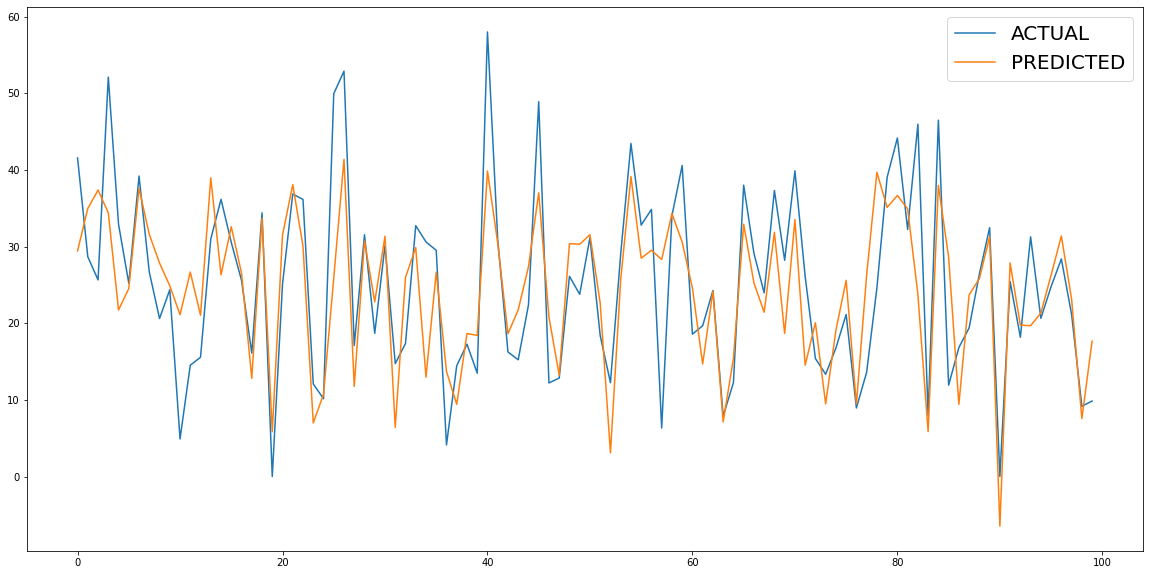

In [114]:
# ploting the line graph of actual and predicted values

plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(y_pred_test_elasticnet[:100])
plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
plt.show()

## **CROSSVALIDATION ON ELASTIC MODEL**

In [115]:
# import gridsearchcv
from sklearn.model_selection import GridSearchCV

In [116]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regularization = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regularization.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [117]:
print("The best fit alpha value is :" ,elastic_regularization.best_params_)
print("\nUsing ",elastic_regularization.best_params_, " the negative mean squared error is: ", elastic_regularization.best_score_)

The best fit alpha value is : {'alpha': 0.01, 'l1_ratio': 0.6}

Using  {'alpha': 0.01, 'l1_ratio': 0.6}  the negative mean squared error is:  -52.861049248319986


In [118]:
# prediction of train data
y_pred_train_cvelastic = elastic_regularization.predict(X_train)

In [119]:
y_pred_test_cvelastic = elastic_regularization.predict(X_test)

In [120]:
print('\n================Evalution Matrix=========================\n')

# calculate the errors for train data
# Calculate the mean absolue error
MAE_cvelasticnet = mean_absolute_error(y_train, y_pred_train_cvelastic)
# Calculate the mean squared error
MSE_cvelasticnet = mean_squared_error(y_train, y_pred_train_cvelastic)
# Calculate the root mean squared error
RMSE_cvelasticnet = np.sqrt(MSE_cvelasticnet)
print('MSE_cvelasticnet:',MSE_cvelasticnet)
print('MAE_cvelasticnet:',MAE_cvelasticnet)
print('RMSE_cvelasticnet:',RMSE_cvelasticnet)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_cvelasticnet = r2_score(y_train, y_pred_train_cvelastic)
print("R2_cvelasticnet :",r2_cvelasticnet)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_cvelastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2_elasticnet :",1-(1-r2_score(y_train, y_pred_train_cvelastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


================Evalution Matrix=========================

MSE_cvelasticnet: 52.56164148630267
MAE_cvelasticnet: 5.590787693371766
RMSE_cvelasticnet: 7.249940791917039
R2_cvelasticnet : 0.6635636397161858
Adjusted R2_elasticnet : 0.6610864276754398


In [121]:
print('\n================Evalution Matrix=========================\n')

# calculate the errors for test data
# Calculate the mean absolue error
MAEtest_cvelasticnet= mean_absolute_error(y_test, y_pred_test_cvelastic)
# Calculate the mean squared error
MSEtest_cvelasticnet = mean_squared_error(y_test, y_pred_test_cvelastic)
# Calculate the root mean squared error
RMSE_cvelasticnet = np.sqrt(MSE_cvelasticnet)
print('MSEtest_cvelasticnet:',MSE_cvelasticnet)
print('MAEtest_cvelasticnet:',MAE_cvelasticnet)
print('RMSEtest_cvelasticnet:',RMSE_cvelasticnet)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_cvelasticnet = r2_score(y_test, y_pred_test_cvelastic)
print("R2test_cvelasticnet :",r2_cvelasticnet)
Adjusted_R2=(1-(1-r2_score(y_test, y_pred_test_cvelastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2test_cvelasticnet :",1-(1-r2_score(y_test, y_pred_test_cvelastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


================Evalution Matrix=========================

MSEtest_cvelasticnet: 52.56164148630267
MAEtest_cvelasticnet: 5.590787693371766
RMSEtest_cvelasticnet: 7.249940791917039
R2test_cvelasticnet : 0.6369419150833129
Adjusted R2test_cvelasticnet : 0.6342686848216161


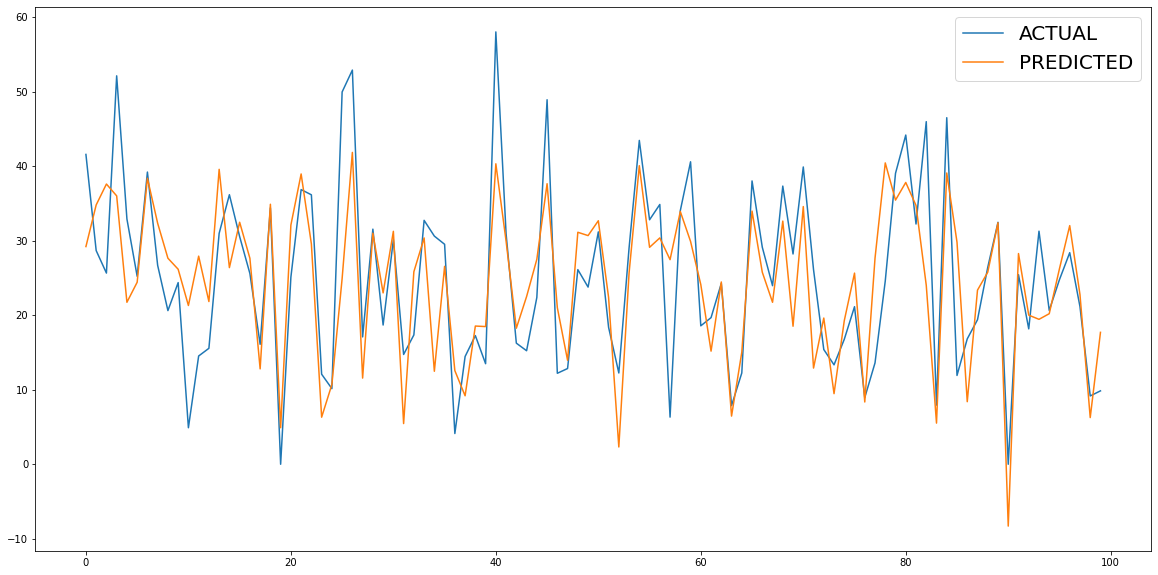

In [122]:
# ploting the line graph of actual and predicted values

plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(y_pred_test_cvelastic[:100])
plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
plt.show()

# **POLYNOMIAL REGRESSION MODEL**









In [123]:
# importing polynomial module
from sklearn.preprocessing import PolynomialFeatures

In [124]:
poly = PolynomialFeatures(degree = 2,include_bias = False)
poly_features = poly.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size = 0.3,random_state = 42)

In [125]:
# creating a polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train,y_train)

LinearRegression()

In [126]:
poly_reg_model.score(X_train,y_train)

0.7945391156154448

In [127]:
# evaluation on train dataset
y_pred_train_poly = poly_reg_model.predict(X_train)

In [128]:
# evaluation on test dataset
y_pred_test_poly = poly_reg_model.predict(X_test)

# Assumptions

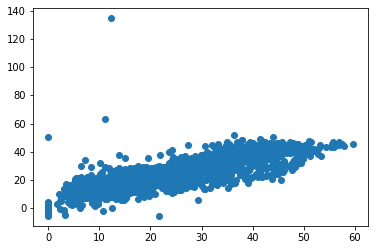

In [129]:
# Plot a scatter plot for the prediction
# Check Homoscedasticity
plt.scatter(y_test,y_pred_test_poly)
plt.show()

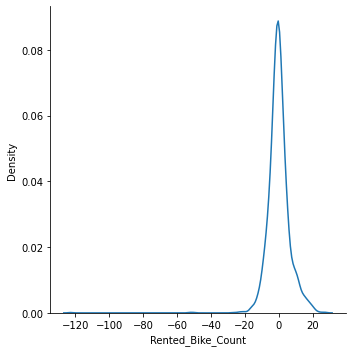

In [130]:
# Plot a scatter plot for residulas
residuals = y_test - y_pred_test_poly
sns.displot(residuals, kind='kde') # To check distributions
plt.show()

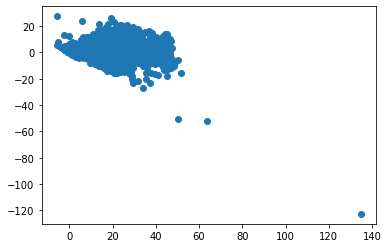

In [131]:
# Plot a scatter plot with respect to prediction and residulas
plt.scatter(y_pred_test_poly,residuals)
plt.show()

In [132]:
print('\n================Evalution Matrix=========================\n')

# calculate the errors for train data
# Calculate the mean absolue error
MAE_poly = mean_absolute_error(y_train, y_pred_train_poly)
# Calculate the mean squared error
MSE_poly = mean_squared_error(y_train, y_pred_train_poly)
# Calculate the root mean squared error
RMSE_poly = np.sqrt(MSE_poly)
print('MSE_poly:',MSE_poly)
print('MAE_poly:',MAE_poly)
print('RMSE_poly:',RMSE_poly)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_poly = r2_score(y_train, y_pred_train_poly)
print("R2_poly :",r2_poly)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_poly))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2_poly :",1-(1-r2_score(y_train, y_pred_train_poly))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


================Evalution Matrix=========================

MSE_poly: 32.11998279550421
MAE_poly: 4.194232933168463
RMSE_poly: 5.667449408288018
R2_poly : 0.7945391156154448
Adjusted R2_poly : 0.7819209118067771


In [133]:
print('\n================Evalution Matrix=========================\n')

# calculate the errors for test data
# Calculate the mean absolue error
MAEtest_poly= mean_absolute_error(y_test, y_pred_test_poly)
# Calculate the mean squared error
MSEtest_poly = mean_squared_error(y_test, y_pred_test_poly)
# Calculate the root mean squared error
RMSE_poly = np.sqrt(MSE_poly)
print('MSEtest_poly:',MSE_poly)
print('MAEtest_poly:',MAE_poly)
print('RMSEtest_poly:',RMSE_poly)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_poly = r2_score(y_test, y_pred_test_poly)
print("R2test_poly :",r2_poly)
Adjusted_R2=(1-(1-r2_score(y_test, y_pred_test_poly))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2test_elasticnet :",1-(1-r2_score(y_test, y_pred_test_poly))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


================Evalution Matrix=========================

MSEtest_poly: 32.11998279550421
MAEtest_poly: 4.194232933168463
RMSEtest_poly: 5.667449408288018
R2test_poly : 0.7165302521568099
Adjusted R2test_elasticnet : 0.6991212009761372


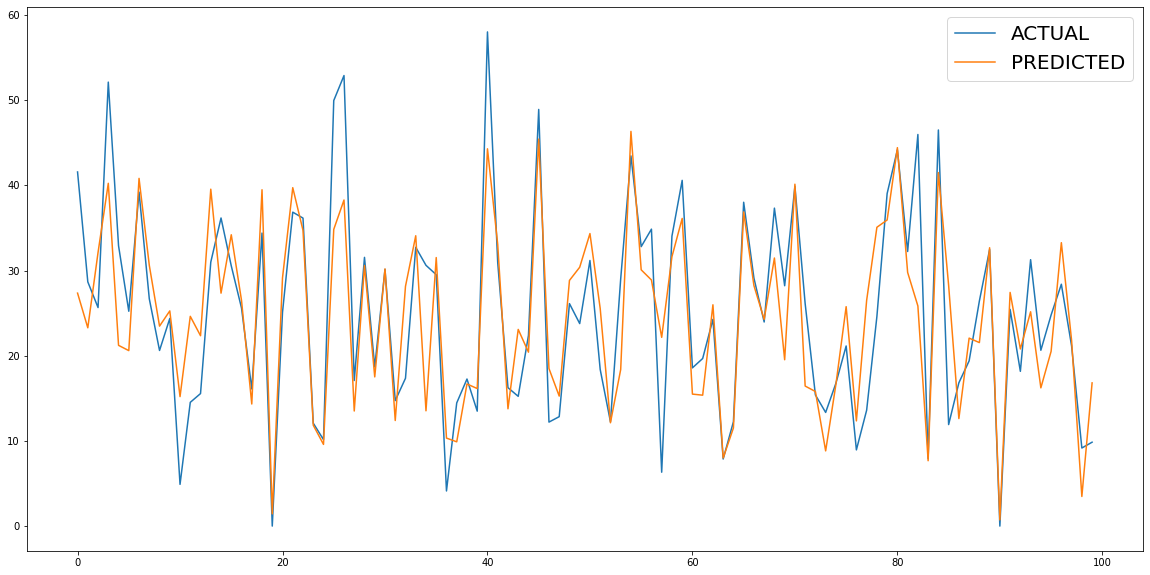

In [134]:
# ploting the line graph of actual and predicted values

plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(y_pred_test_poly[:100])
plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
plt.show()

##Decision Tree Regressor

In [135]:
from sklearn.tree import DecisionTreeRegressor   
from sklearn.tree import plot_tree               
from sklearn.metrics import mean_squared_error  


In [136]:
# Creating object wth Decision tree regressor with critera of mean squared error, maximum depth being 10, maximum leaf noodes being 120

decision_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=10, max_leaf_nodes=120)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=120)

In [137]:
# Getting the y_train and y-test value

y_pred_train_dtree = decision_regressor.predict(X_train)
y_pred_test_dtree = decision_regressor.predict(X_test)

# Evaluation Matrix for Decision Tree Regressor

In [138]:
print('\n================Evalution Matrix=========================\n')

# calculate the errors for train data
# Calculate the mean absolue error
MAE_dtree = mean_absolute_error(y_train, y_pred_train_dtree)
# Calculate the mean squared error
MSE_dtree = mean_squared_error(y_train, y_pred_train_dtree)
# Calculate the root mean squared error
RMSE_dtree = np.sqrt(MSE_dtree)
print('MSE_dtree:',MSE_dtree)
print('MAE_dtree:',MAE_dtree)
print('RMSE_dtree:',RMSE_dtree)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_dtree = r2_score(y_train, y_pred_train_dtree)
print("R2_dtree :",r2_dtree)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_dtree))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2_dtree :",1-(1-r2_score(y_train, y_pred_train_dtree))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


================Evalution Matrix=========================

MSE_dtree: 13.070675961683936
MAE_dtree: 2.6260996582763205
RMSE_dtree: 3.615338982956361
R2_dtree : 0.9163912179004213
Adjusted R2_dtree : 0.9112564563330937


In [139]:
print('\n================Evalution Matrix=========================\n')

# calculate the errors for test data
# Calculate the mean absolue error
MAEtest_dtree= mean_absolute_error(y_test, y_pred_test_dtree)
# Calculate the mean squared error
MSEtest_dtree = mean_squared_error(y_test, y_pred_test_dtree)
# Calculate the root mean squared error
RMSE_dtree = np.sqrt(MSE_dtree)
print('MSEtest_dtree:',MSE_dtree)
print('MAEtest_dtree:',MAE_dtree)
print('RMSEtest_dtree:',RMSE_dtree)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_dtree = r2_score(y_test, y_pred_test_dtree)
print("R2test_dtree :",r2_dtree)
Adjusted_R2=(1-(1-r2_score(y_test, y_pred_test_dtree))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2test_dtree :",1-(1-r2_score(y_test, y_pred_test_dtree))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


================Evalution Matrix=========================

MSEtest_dtree: 13.070675961683936
MAEtest_dtree: 2.6260996582763205
RMSEtest_dtree: 3.615338982956361
R2test_dtree : 0.8491886675657885
Adjusted R2test_dtree : 0.8399267190688187


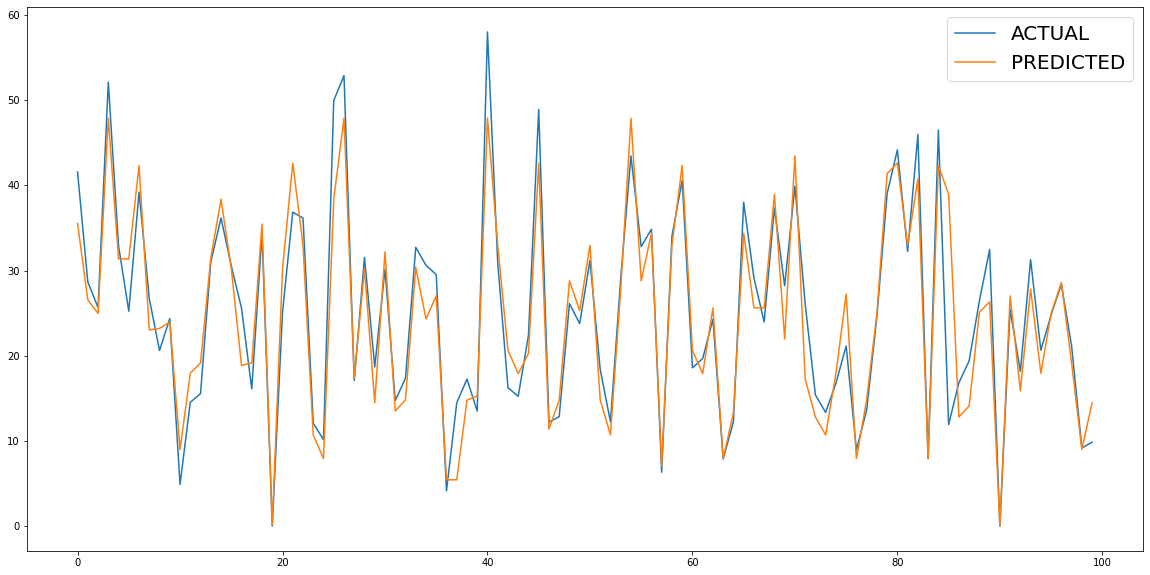

In [140]:
# ploting the line graph of actual and predicted values

plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(y_pred_test_dtree[:100])
plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
plt.show()

In [151]:
# Check Final dataframe of All models
final_result=pd.concat([train_results_df,test_results_df],keys=['Train set','Test set'])
final_result

Model     MAE      MSE    RMSE  R2_score  \
Train set 0  Random Forest  2.5646  12.3311  3.5116    0.9211   
          1  Random Forest  2.5646  12.3311  3.5116    0.9211   
Test set  0  Random Forest  2.7590  14.9844  3.8710    0.9010   
          1  Random Forest  2.7590  14.9844  3.8710    0.9010   
          2  Random Forest  2.7590  14.9844  3.8710    0.9010   
          3  Random Forest  2.7590  14.9844  3.8710    0.9010   
          4  Random Forest  2.7590  14.9844  3.8710    0.9010   

             Adjusted R2 score  
Train set 0             0.9205  
          1             0.9205  
Test set  0             0.9003  
          1             0.9003  
          2             0.9003  
          3             0.9003  
          4             0.9003

##6. Final conclusion



1. Rental bikes are in demand on holidays or non-holidays.We may say that the number of rental bikes is significantly higher on non-holidays than on holidays.

2. 8AM and 6PM have high demand people go to their work at 8 am and return from work at 6 pm. The demand for rented motorcycles is most closely related to the number of working hours per day.

3. People prefer bikes rented in the morning rather than in the evening.

4. People have booked more bikes except in few cases when rain has subsided.

5. After testing various feature combinations using linear regression, the model was found to be unsuitable. Because the data is so widely scattered, it became clear. Fitting a line didn't seem realistic.

6. The most critical factors for predicting the number of bikes needed were hour, temperature and solar radiation.

7. With good model performance and low rmse, the random forest regressor outperforms the linear regression.